# COGS 109 Final Project - Group5

# Regression Analysis on Sale Price and Construction Cost of Iran Residential Buildings

**Member:**


1. Yiyi Xu  -    A15403923
2. Shuyang Zhang - A15564300
3. Xing Hong   - A15867895
4. Yuru Zhou   - A16014225


# Abstract (Including Background)



Housing prices are a viral topic in the modern world. Everybody wants to know how the price of the house is determined, and to where it will change in the future. The United States real estate market is mainly influenced by economy, interest rates, average income, population size, etc. However, this might not be the same for other countries in this world.

For this project, we collected data from the UCI Machine Learning Repository *http://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set* that include essential indicators of housing price and other physical and economic factors corresponding to residential building in Tehran, Iran. The data set consists of 372 samples and 105 variables, which are 8 physical and financial variables, 19 economic variables from 5 time-lags (5*19 = 95), and two output variables: actual construction cost and sale price). This study aims to investigate that whether the sale price and actual construction cost can be accurately predicted based on the chosen physical and economic factors (Total floor area of the building [v2], Price of the unit at the beginning of the project per m^2 [v8], CPI of housing, water, fuel & power in the base year(economic) [v26], and Population of the city(economic) [v28]) as well as their combination. We have implemented a brief correlation check for the datasets we choose in the first place. The result shows that the datasets v2, v8, v26 and v28 are acceptably correlated to the sale price and the actual construction cost.

**We hypothesize that for a single predictor, the predicted values of price and cost have a small deviation from the actual observed values without the issue of overfitting; and the model using a single predictor ought to be better than the ones using multiple variables.** To test this hypothesis, we first utilized k-Fold cross-validation techniques to split the data into training data (80%) and testing data(20%), then performed univariate linear regression, multivariate linear regression, and polynomial regression on both training and testing data, and finally calculated the MSE and other supplemental statistics. MSE can be used to test the model's ability to predict new data. Generally, smaller MSE indicates better estimation and greater accuracy. Moreover, a signifies variance between the training MSE with testing MSE flag the overfitting issue. The result showed that univariate linear regression can accurately predict the actual construction costs and actual sale price with the given variables without the issue of overfitting. However, the model using a single predictor ought to be better than the ones using multiple variables When comparing the MSE between univariate and multivariate linear regression models, we can conclude that multivariate linear regression models generally have higher accuracy than univariate linear regression models since multivariate MSE is smaller than univariate MSE. Furthermore, the 4 variables linear regression has the smallest MSE for actual sale price and actual construction costs, which means it can most accurately predict both.


# Method



  First, we cleaned the data set to include only the necessary variables — Total floor area of the building [v2], Price of the unit at the beginning of the project per m^2 [v8], CPI of housing, water, fuel & power in the base hear(economic) [v26], and Population of the city(economic) [v28]— and reformatted the column name to create a standardized data set for analysis. With the cleaned data set, we performed descriptive data analysis to identify the general pattern of data points across dimensions. Then we calculated and visualized the Pearson Correlation Matrix to examine the correlation between the variables as well as how the variables correlate with our target outcome. After this step, we can rank the importance of the factors based on the correlation and pick the most influential ones to train the models. Next, we utilized Cross-validation method to split the data into training data (80%) and testing data(20%) for the preparation of univariate and multivariate linear regression.

  The reason why we decided to choose linear regression is that our dataset contains continuous variables and categorical variables. We first trained the univariate linear regression model for each variable that we have chosen with training data. We then use the trained linear model on testing data to see whether they can well predict the actual sale price and actual construction cost respectively. This greatly reduces the bias because we use most of the data for fitting, and also greatly reduces the variance because we also leave sufficient data in the validation set. Mean squared error (MSE) , an average squared difference between the estimated values and the actual value, is calculated for each of the univariate linear regression models. It is the criteria we use to evaluate whether the model has a good prediction without the issue of overfitting. The smaller MSE indicates better estimates. In addition, we reported the training MSE and testing MSE with a bar-plot on Price and Cost for the purpose of comparing the error of prediction across all models. Overfitting is suspected when there is a remarkable difference between training MSE and testing MSE, in particular the model accuracy was high with the training data and dropped significantly with respect to the testing data. 

  Subsequently, we performed a multivariate linear regression model to measure how multiple variables interact together to influence the prediction. We imported the sklearn  linear model package to help us conduct multivariate linear regression more easily. We constructed models for 2 variables, 3 variables, and 4 variables and computed Mean Squared Error (MSE), R-squared, Adjusted R-squared, k-Fold Cross Validation score. The R-squared increases when the number of features increases. Because of this, sometimes a more robust evaluator is preferred to compare the performance between different models. The evaluator is called adjusted R-squared and it only increases, if the addition of the variable reduces the MSE. In general, having a R-squared value closer to 1 and smaller MSE means a better estimation. Instead of using training MSE and testing MSE to check overfitting issues, we can use k-Fold Cross Validation score to flag the issue of overfitting for multivariate linear regression models. The smaller k-Fold Cross Validation score means higher chance of overfitting. 

  The main idea of linear models is to fit a straight line to our data, considering that the data might have a quadratic distribution, we should choose a quadratic function and applying a polynomial transformation may give us better results as a supplement to our experiment. Therefore, we conducted Polynomial regression as an additional analysis to see whether it has higher accuracy than univariate and multivariate linear regression models.


**Research Question**

Can the sale price and actual construction cost be accurately predicted based on the chosen physical and economic factors :
1. Total floor area of the building [v2], 
2. Price of the unit at the beginning of the project per m^2 [v8], 
3. CPI of housing, water, fuel & power in the base year(economic) [v26], 
4. and Population of the city(economic) [v28]) 

as well as their combinations？

We hypothesize that for single predictor, the predicted values of price and cost have a small deviation from the actual observed values without the issue of overfitting; and the model using single predictor ought to be better than the ones using multiple variables.

# Data Description and Variables

Data set includes construction cost, sale prices, project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran.
We will collect our data on the repository of uci(download from a previously published dataset), a collection of real estate single-family residential apartments in Tehran, Iran. Link: http://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set

**Types of analysis:** Regression

## I. Importing Modules and Defining an Evaluation Table

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import folium
from folium.plugins import HeatMap
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
evaluation_C = evaluation.copy()

In [4]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

## II. Data Import and Cleaning


In [5]:
#extract the data from the first sheet of the original excel 
#turn it into csv file
#make a dataframe df_RB_total from the csv file
df_RB_total = pd.read_csv('Residential-Building-Data-1.csv')
df_RB_total.shape

(373, 109)

In [6]:
#create another dataframe df_RB_research that contains the columns that are useful for the research
df_RB_research = df_RB_total.loc[:,['PROJECT DATES (PERSIAN CALENDAR)','Unnamed: 1','Unnamed: 2',
                                    'Unnamed: 3','Unnamed: 5','Unnamed: 11',
                                    'Unnamed: 27','Unnamed: 29','OUTPUTS','Unnamed: 108']]
df_RB_research = df_RB_research.rename(columns = {'PROJECT DATES (PERSIAN CALENDAR)':"START YEAR",'Unnamed: 1':'START QUARTER',
                                                  'Unnamed: 2':"COMPLETION YEAR",'Unnamed: 3':'COMPLETION QUARTER',
                                                  'Unnamed: 5':'TOTAL FLOOR AERA OF THE BUILDING','Unnamed: 11':
                                                  'PRICE of the UNIT at the BEGINNING of the PROJECT per m^2',
                                                  'Unnamed: 27':'CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR',
                                                  'Unnamed: 29':'POPULATION of the CITY','OUTPUTS':'Actual sales prices (output)',
                                                  'Unnamed: 108':'Actual construction costs (output)'},)


In [7]:
#create another dataframe df_RB_research that contains the columns that are useful for the research
#df_RB_research['PROJECT DATES (PERSIAN CALENDAR)'] = df_RB_total.loc[:,['PROJECT DATES (PERSIAN CALENDAR)']]
##df_RB_research

In [8]:
df_RB_research.head(3)

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,TOTAL FLOOR AERA OF THE BUILDING,PRICE of the UNIT at the BEGINNING of the PROJECT per m^2,"CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR",POPULATION of the CITY,Actual sales prices (output),Actual construction costs (output)
0,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-2,V-8,V-26,V-28,V-9,V-10
1,81.00,1.00,85.00,1.00,3150.00,1200.00,63.25,42587,2200.00,410.00
2,84.00,1.00,89.00,4.00,7600.00,2900.00,105.32,45966,5000.00,1000.00


In [11]:
#Do data cleaning
df_no_first_row = df_RB_research.drop(0).reset_index()
df_research = df_no_first_row.dropna()

df_research.head(3)

,index,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,TOTAL FLOOR AERA OF THE BUILDING,PRICE of the UNIT at the BEGINNING of the PROJECT per m^2,"CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR",POPULATION of the CITY,Actual sales prices (output),Actual construction costs (output)
0,1,81.00,1.00,85.00,1.00,3150.00,1200.00,63.25,42587,2200.00,410.00
1,2,84.00,1.00,89.00,4.00,7600.00,2900.00,105.32,45966,5000.00,1000.00
2,3,78.00,1.00,81.00,4.00,4800.00,630.00,38.34,39066,1200.00,170.00


In [10]:
# Convert string into values for use
df_search = df_research.values
# treat the data as array instead of an object
df_search = df_search.astype(np.float64)


array([[1.00000e+00, 8.10000e+01, 1.00000e+00, ..., 4.25870e+04,
        2.20000e+03, 4.10000e+02],
       [2.00000e+00, 8.40000e+01, 1.00000e+00, ..., 4.59660e+04,
        5.00000e+03, 1.00000e+03],
       [3.00000e+00, 7.80000e+01, 1.00000e+00, ..., 3.90660e+04,
        1.20000e+03, 1.70000e+02],
       ...,
       [3.70000e+02, 8.40000e+01, 4.00000e+00, ..., 3.53220e+04,
        8.60000e+02, 2.20000e+02],
       [3.71000e+02, 8.20000e+01, 3.00000e+00, ..., 2.24175e+04,
        1.10000e+03, 1.10000e+02],
       [3.72000e+02, 8.00000e+01, 1.00000e+00, ..., 4.14070e+04,
        4.60000e+02, 5.00000e+01]])

## III. Data Visualization (Exploratory Descriptive Analysis)



**1.Visualization of Total Floor Aera of the Building(V2)**

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

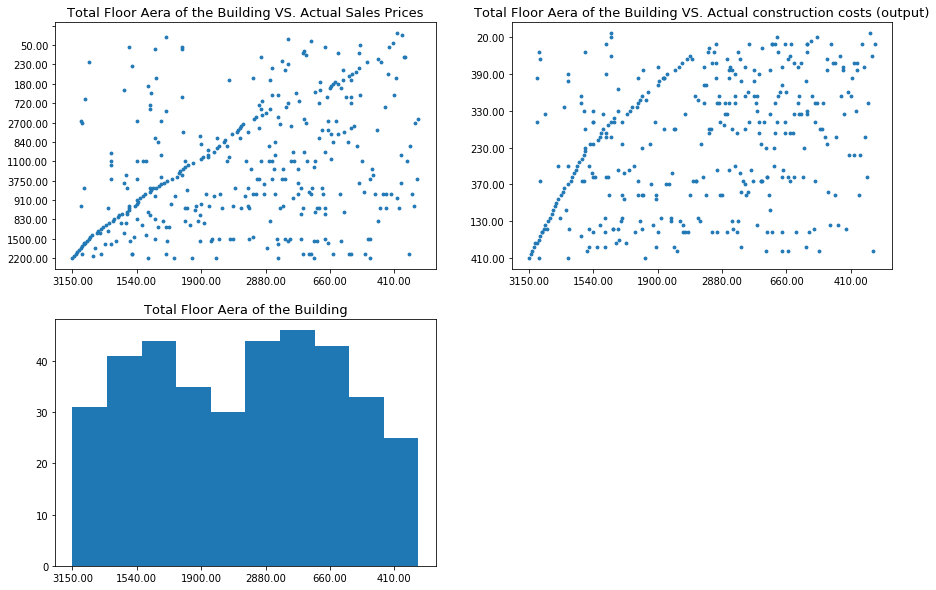

In [10]:
#Visualization of TOTAL FLOOR AERA OF THE BUILDING(v2)
plt.rcParams['figure.figsize'] = [15,10]
fig,axs1 = plt.subplots(2,2)

#plot a scatterplot of TOTAL FLOOR AERA OF THE BUILDING(v2) vs Actual sales prices (output) on the upperleft corner
x_totalfloor = df_research["TOTAL FLOOR AERA OF THE BUILDING"].values
y_ASP = df_research['Actual sales prices (output)'].values
xtick_spacing = 40        
ytick_spacing = 10        

axs1[0,0].scatter(x_totalfloor,y_ASP,s=8)
axs1[0,0].set_title('Total Floor Aera of the Building VS. Actual Sales Prices', fontsize = 13)
axs1[0,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a scatterplot of TOTAL FLOOR AERA OF THE BUILDING(v2) vs Actual construction costs (output) on the upperright corner
y_ACC = df_research["Actual construction costs (output)"].values

axs1[0,1].scatter(x_totalfloor,y_ACC,s=8)
axs1[0,1].set_title('Total Floor Aera of the Building VS. Actual construction costs (output)', fontsize = 13)
axs1[0,1].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,1].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a boxplot of TOTAL FLOOR AERA OF THE BUILDING(v2) vs Actual sales prices (output) on the lowerleft corner

axs1[1,0].hist(x_totalfloor)
axs1[1,0].set_title('Total Floor Aera of the Building', fontsize = 13)
axs1[1,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
axs1[1,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

axs1[1,1].axis('off')
plt.tight_layout

**2.Visualization of Price of the Unit at the Beginning of the Project per m^2**

(0.0, 1.0, 0.0, 1.0)

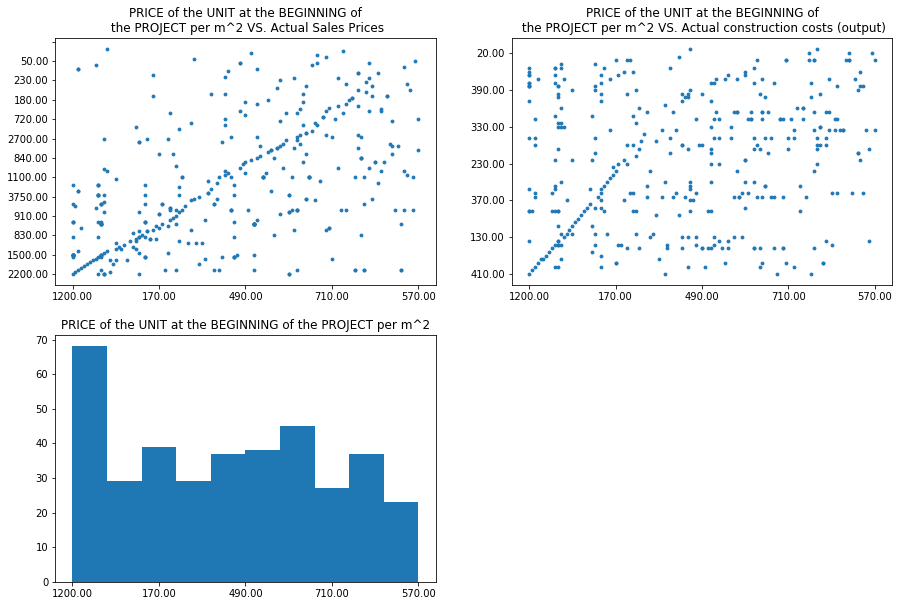

In [297]:
# Visualization of PRICE of the UNIT at the BEGINNING of the PROJECT per m^2
plt.rcParams['figure.figsize'] = [15,10]
fig,axs1 = plt.subplots(2,2)

#plot a scatterplot of PRICE of the UNIT at the BEGINNING vs Actual sales prices (output) on the upperleft corner
x_priceUnit = df_research["PRICE of the UNIT at the BEGINNING of the PROJECT per m^2"].values
y_ASP = df_research['Actual sales prices (output)'].values

xtick_spacing = 30        
ytick_spacing = 10 

axs1[0,0].scatter(x_priceUnit,y_ASP,s=8)
axs1[0,0].set_title('PRICE of the UNIT at the BEGINNING of\n the PROJECT per m^2 VS. Actual Sales Prices')
axs1[0,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
axs1[0,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a scatterplot of PRICE of the UNIT at the BEGINNING of the PROJECT per m^2 vs Actual construction costs (output) on the upperright corner
y_ACC = df_research["Actual construction costs (output)"].values

axs1[0,1].scatter(x_priceUnit,y_ACC,s=8)
axs1[0,1].set_title('PRICE of the UNIT at the BEGINNING of\n the PROJECT per m^2 VS. Actual construction costs (output)')
axs1[0,1].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,1].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a boxplot of PRICE of the UNIT at the BEGINNING vs Actual sales prices (output) on the lowerleft corner

axs1[1,0].hist(x_priceUnit)
axs1[1,0].set_title('PRICE of the UNIT at the BEGINNING of the PROJECT per m^2')
axs1[1,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[1,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

axs1[1,1].axis('off')



**3.Visualization of CPI of Housing, Water,Fuel & Power in the Base Year**

(0.0, 1.0, 0.0, 1.0)

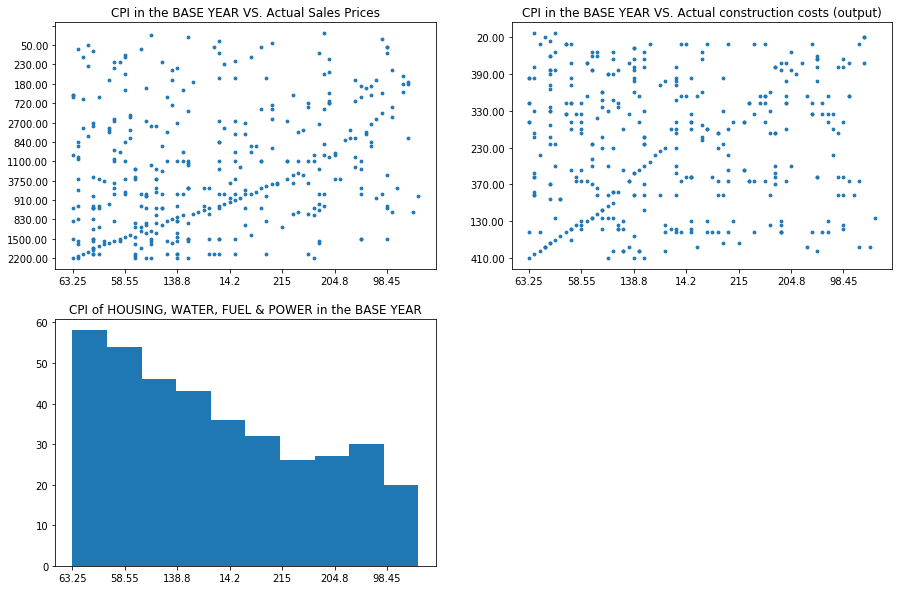

In [298]:
# Visualization of CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR
plt.rcParams['figure.figsize'] = [15,10]
fig,axs1 = plt.subplots(2,2)

#plot a scatterplot of CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR vs Actual sales prices (output) on the upperleft corner
x_cpi = df_research["CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR"].values
xtick_spacing = 10        
ytick_spacing = 10 

axs1[0,0].scatter(x_cpi,y_ASP,s=8)
axs1[0,0].set_title('CPI in the BASE YEAR VS. Actual Sales Prices')
axs1[0,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a scatterplot of CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR vs Actual construction costs (output) on the upperright corner

axs1[0,1].scatter(x_cpi,y_ACC,s=8)
axs1[0,1].set_title('CPI in the BASE YEAR VS. Actual construction costs (output)')
axs1[0,1].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,1].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a boxplot of CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR vs Actual sales prices (output) on the lowerleft corner

axs1[1,0].hist(x_cpi)
axs1[1,0].set_title('CPI of HOUSING, WATER, FUEL & POWER in the BASE YEAR')
axs1[1,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[1,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

axs1[1,1].axis('off')

**4.Visualization of Population of the City**

(0.0, 1.0, 0.0, 1.0)

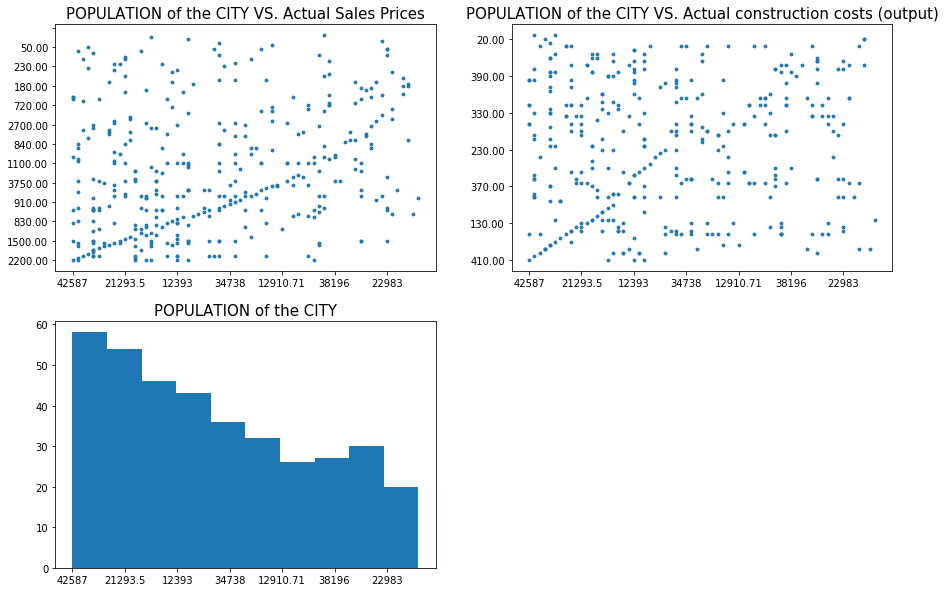

In [299]:
# Visualization of POPULATION of the CITY
plt.rcParams['figure.figsize'] = [15,10]
fig,axs1 = plt.subplots(2,2)

#plot a scatterplot of POPULATION of the CITY vs Actual sales prices (output) on the upperleft corner
x_pop = df_research["POPULATION of the CITY"].values
xtick_spacing = 10        
ytick_spacing = 10 

axs1[0,0].scatter(x_pop,y_ASP,s=8)
axs1[0,0].set_title('POPULATION of the CITY VS. Actual Sales Prices', fontsize = 15)
axs1[0,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a scatterplot of POPULATION of the CITY vs Actual construction costs (output) on the upperright corner

axs1[0,1].scatter(x_pop,y_ACC,s=8)
axs1[0,1].set_title('POPULATION of the CITY VS. Actual construction costs (output)', fontsize = 15)
axs1[0,1].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[0,1].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

#plot a boxplot of POPULATION of the CITY vs Actual sales prices (output) on the lowerleft corner

axs1[1,0].hist(x_pop)
axs1[1,0].set_title('POPULATION of the CITY', fontsize = 15)
axs1[1,0].xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing ))
axs1[1,0].yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing ))

axs1[1,1].axis('off')

## IV. Covariance Matrix on the 4 Predictors Mentioned in the Research Question

In [300]:
data = df_research.values
variable_matrix = data[:,5:11]
variable_matrix = variable_matrix.astype(np.float64)
mean1 = np.mean(variable_matrix[:,0])
mean2 = np.mean(variable_matrix[:,1])
mean3 = np.mean(variable_matrix[:,2])
mean4 = np.mean(variable_matrix[:,3])
mean5 = np.mean(variable_matrix[:,4])
mean6 = np.mean(variable_matrix[:,5])
mean = np.array([mean1, mean2, mean3, mean4, mean5, mean6])
sample_num = len(variable_matrix[:,0])

# zero-mean data matrix
Z = variable_matrix.T - np.tile(mean,[sample_num,1]).T
# covariance matrix
C = np.matmul(Z, Z.T)/(sample_num - 1)
C

array([[3.24854299e+06, 4.18768911e+05, 8.76318833e+03, 1.40040823e+06,
        5.52877513e+05, 7.42512299e+04],
       [4.18768911e+05, 9.91669765e+05, 3.27373603e+04, 2.88229800e+06,
        1.17274219e+06, 1.27930602e+05],
       [8.76318833e+03, 3.27373603e+04, 2.67639639e+03, 2.18811519e+05,
        3.78897230e+04, 6.54372771e+03],
       [1.40040823e+06, 2.88229800e+06, 2.18811519e+05, 1.92393866e+08,
        3.48370953e+06, 6.27799161e+05],
       [5.52877513e+05, 1.17274219e+06, 3.78897230e+04, 3.48370953e+06,
        1.45463632e+06, 1.56137409e+05],
       [7.42512299e+04, 1.27930602e+05, 6.54372771e+03, 6.27799161e+05,
        1.56137409e+05, 2.64477544e+04]])

### Pearson correlation matrix on the 4 predictors we picked

Where v2, v8, v26, v28 represent 0, 1, 2, 3, respectively.
4, 5 represents Actual sale price and construction cost
Note that: 
V2: Total floor area of the building
v8: Price of the unit at the beginning of the project per m^2
v26: CPI of housing, water, fuel and power in the base year
v28: population of the city


,0,1,2,3,4,5
0,1.000000,0.233317,0.093982,0.056016,0.254336,0.253317
1,0.233317,1.000000,0.635455,0.208670,0.976432,0.789944
2,0.093982,0.635455,1.000000,0.304929,0.607252,0.777778
3,0.056016,0.208670,0.304929,1.000000,0.208242,0.278311
4,0.254336,0.976432,0.607252,0.208242,1.000000,0.796041
5,0.253317,0.789944,0.777778,0.278311,0.796041,1.000000


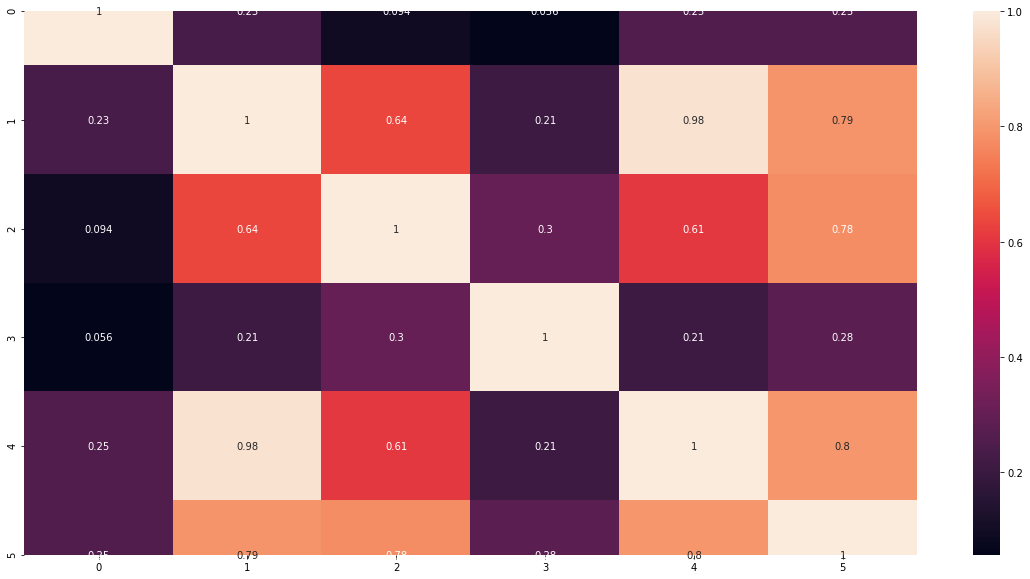

In [301]:
# Simple heatmap on corr
plt.figure(figsize=(20, 10))
target = pd.DataFrame(variable_matrix)
corr = target.corr(method = 'pearson')
sns.heatmap(corr,  annot = True)
print('Where v2, v8, v26, v28 represent 0, 1, 2, 3, respectively.')
print('4, 5 represents Actual sale price and construction cost')
print('Note that: ')
print('V2: Total floor area of the building') 
print('v8: Price of the unit at the beginning of the project per m^2') 
print('v26: CPI of housing, water, fuel and power in the base year')
print('v28: population of the city')
corr

Based on the correlation matrix, we can conclude that *v8 & v26* has the most correlation, while ***v8*** correlates with both *Sale Price* and *Construction cost* the most (0.98 & 0.79). Addition to that, *Sale Price* and *Cost* are highly correlated. Seemingly, ***v8 and v26*** strongly correlated with the *Price* and *Cost*.

## V. Data Preprocessing: split into training and test data sets

In [302]:
# shuffle and split data
#split the data set into 20% testing data and 80% training data
df_values = df_research.values
df_train, df_test = train_test_split(df_values, test_size = 0.2, train_size = 0.8, shuffle = True)

## VI. Univariate Regression

In [303]:
# Note that the predictors involved are v2, v8, v26, v28
# and v9, 10 are used for regression
# V2: Total floor area of the building
# v8: Price of the unit at the beginning of the project per m^2
# v26: CPI of housing, water, fuel and power in the base year
# v28: population of the city
# v9(output): Actual sale prices
# v10(output): Actual construction costs
df_use = df_train

### Model 1: Actual Sale Price = w0 + w1*V2 where V2 is Total floor area of the building, and w0, w1 are the weights.

In [304]:
v2_model_1 = df_use[:, 5]
Actual_Sale_Price_M1 = df_use[:, 9]

In [305]:
## Create A, the augmented data array
X = v2_model_1 
X = X.astype(np.float64) # X was treated as an object and needed to be floats
Y = Actual_Sale_Price_M1
Y = np.array(Y)
Y = Y.astype(np.float64)

ones = np.ones([len(X), ], dtype = int)
A = np.vstack((ones, X))
A1 = A.transpose()
A1.shape

(297, 2)

In [306]:
## Solve for w, the weight vector
ws = np.linalg.lstsq(A1, Y, rcond=None)[0]
ws

array([1.04354842e+03, 2.12883132e-01])

In [307]:
print('Model1: Actual Sale Price = %f + %f * V2 ' % (ws[0], ws[1]))

Model1: Actual Sale Price = 1043.548416 + 0.212883 * V2 


### Model 2: Actual construction costs = w0 + w1*V2 where V2 is Total floor area of the building, and w0, w1 are the weights.

In [308]:
v2_model_2 = df_use[:, 5]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X2 = v2_model_2 
X2 = X2.astype(np.float64) # X was treated as an object and needed to be floats
Y2 = Actual_construction_costs
Y2 = np.array(Y2)
Y2 = Y2.astype(np.float64)

ones2 = np.ones([len(X2), ], dtype = int)
A2 = np.vstack((ones2, X2))
A22 = A2.transpose()
A22.shape # 372 X 2
## Solve for w, the weight vector
ws2 = np.linalg.lstsq(A22, Y2, rcond=None)[0]
print('Model2: Actual construction costs = %f + %f * V2 ' % (ws2[0], ws2[1]))

Model2: Actual construction costs = 183.782995 + 0.027523 * V2 


### Model 3: Actual Sale Price = w0 + w1*V8 where V8 is Price of the unit at the beginning of the project per m^2, and w0, w1 are the weights.

In [309]:
v8_model_3 = df_use[:, 6]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X3 = v8_model_3
X3 = X3.astype(np.float64) # X was treated as an object and needed to be floats
Y3 = Actual_Sale_Price
Y3 = np.array(Y3)
Y3 = Y3.astype(np.float64)

ones3 = np.ones([len(X3), ], dtype = int)
A3 = np.vstack((ones3, X3))
A33 = A3.transpose()
A33.shape # 372 X 2
## Solve for w, the weight vector
ws3 = np.linalg.lstsq(A33, Y3, rcond=None)[0]
print('Model3: Actual Sale Price = %f + %f * V8 ' % (ws3[0], ws3[1]))

Model3: Actual Sale Price = 100.046507 + 1.186078 * V8 


### Model 4: Actual construction costs = w0 + w1*V8 where V8 is Price of the unit at the beginning of the project per m^2, and w0, w1 are the weights.

In [310]:
v8_model_4 = df_use[:, 6]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X4 = v8_model_4
X4 = X4.astype(np.float64) # X was treated as an object and needed to be floats
Y4 = Actual_construction_costs
Y4 = np.array(Y4)
Y4 = Y4.astype(np.float64)

ones4 = np.ones([len(X4), ], dtype = int)
A4 = np.vstack((ones4, X4))
A44 = A4.transpose()
A44.shape # 372 X 2
## Solve for w, the weight vector
ws4 = np.linalg.lstsq(A44, Y4, rcond=None)[0]
print('Model4: Actual construction costs = %f + %f * V8 ' % (ws4[0], ws4[1]))

Model4: Actual construction costs = 94.975321 + 0.123372 * V8 


### Model 5: Actual Sale Price = w0 + w1*V26 where V26 is CPI of housing, water, fuel and power in the base year, and w0, w1 are the weights.

In [311]:
v26_model_5 = df_use[:, 7]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X5 = v26_model_5
X5 = X5.astype(np.float64) # X was treated as an object and needed to be floats
Y5 = Actual_Sale_Price
Y5 = np.array(Y5)
Y5 = Y5.astype(np.float64)

ones5 = np.ones([len(X5), ], dtype = int)
A5 = np.vstack((ones5, X5))
A55 = A5.transpose()
A55.shape # 372 X 2
## Solve for w, the weight vector
ws5 = np.linalg.lstsq(A55, Y5, rcond=None)[0]
print('Model5: Actual Sale Price = %f + %f * V26 ' % (ws5[0], ws5[1]))

Model5: Actual Sale Price = 126.129641 + 14.770122 * V26 


### Model 6: Actual construction costs = w0 + w1*V26 where V26 is CPI of housing, water, fuel and power in the base year, and w0, w1 are the weights.

In [312]:
v26_model_6 = df_use[:, 7]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X6 = v26_model_6
X6 = X6.astype(np.float64) # X was treated as an object and needed to be floats
Y6 = Actual_construction_costs
Y6 = np.array(Y6)
Y6 = Y6.astype(np.float64)

ones6 = np.ones([len(X6), ], dtype = int)
A6 = np.vstack((ones6, X6))
A66 = A6.transpose()
A66.shape # 372 X 2
## Solve for w, the weight vector
ws6 = np.linalg.lstsq(A66, Y6, rcond=None)[0]
print('Model6: Actual construction costs = %f + %f * V26 ' % (ws6[0], ws6[1]))

Model6: Actual construction costs = 16.997770 + 2.462560 * V26 


### Model 7: Actual Sale Price = w0 + w1*V28 where V28 is population of the city, and w0, w1 are the weights.

In [313]:
v28_model_7 = df_use[:, 8]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X7 = v28_model_7
X7 = X7.astype(np.float64) # X was treated as an object and needed to be floats
Y7 = Actual_Sale_Price
Y7 = np.array(Y7)
Y7 = Y7.astype(np.float64)

ones7 = np.ones([len(X7), ], dtype = int)
A7 = np.vstack((ones7, X7))
A77 = A7.transpose()
A77.shape # 372 X 2
## Solve for w, the weight vector
ws7 = np.linalg.lstsq(A77, Y7, rcond=None)[0]
print('Model7: Actual Sale Price = %f + %f * V28 ' % (ws7[0], ws7[1]))

Model7: Actual Sale Price = 833.073955 + 0.020715 * V28 


### Model 8: Actual construction costs = w0 + w1*V28 where V28 is population of the city, and w0, w1 are the weights.

In [314]:
v28_model_8 = df_use[:, 8]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X8 = v28_model_8
X8 = X8.astype(np.float64) # X was treated as an object and needed to be floats
Y8 = Actual_construction_costs
Y8 = np.array(Y8)
Y8 = Y8.astype(np.float64)

ones8 = np.ones([len(X8), ], dtype = int)
A8 = np.vstack((ones8, X8))
A88 = A8.transpose()
A88.shape # 372 X 2
## Solve for w, the weight vector
ws8 = np.linalg.lstsq(A88, Y8, rcond=None)[0]
print('Model8: Actual construction costs = %f + %f * V28 ' % (ws8[0], ws8[1]))

Model8: Actual construction costs = 138.757408 + 0.003315 * V28 


### Graphs of Model 1 to Model 4

In [315]:
c
M1_predict = ws[0] + ws[1] * X
M2_predict = ws2[0] + ws2[1] * X2
M3_predict = ws3[0] + ws3[1] * X3
M4_predict = ws4[0] + ws4[1] * X4

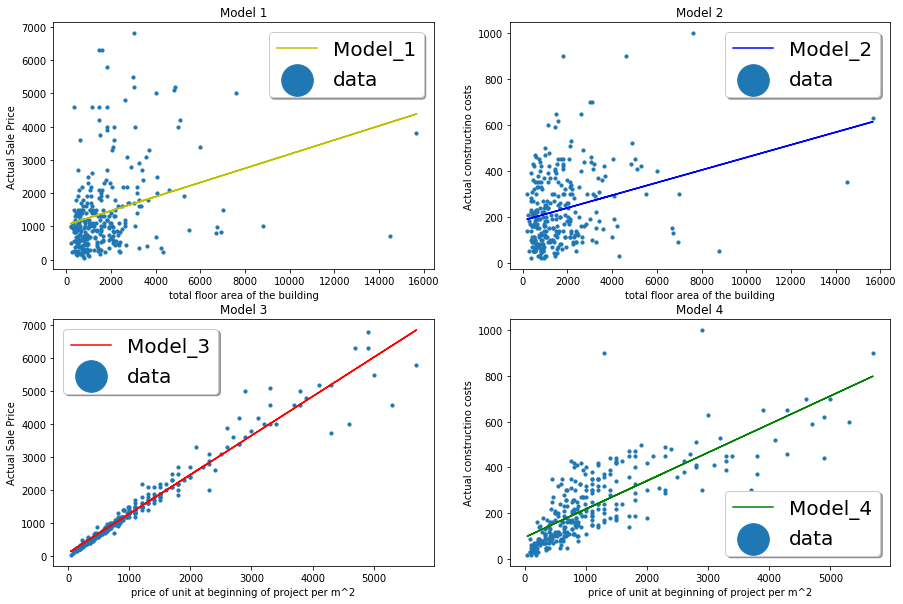

In [316]:
fig, axes1 = plt.subplots(2, 2, figsize=(15, 10))
# Model 1
axes1[0][0].scatter(X, Y, s = 10, label = 'data')
axes1[0][0].plot(X, M1_predict, color = 'y', label = 'Model_1')
axes1[0][0].set(xlabel = 'total floor area of the building', ylabel = 'Actual Sale Price', title = 'Model 1')
axes1[0][0].legend(shadow = True, markerscale = 10, fontsize = 20)

# Model 2
axes1[0][1].scatter(X2, Y2, s = 10, label = 'data')
axes1[0][1].plot(X2, M2_predict, color = 'b', label = 'Model_2')
axes1[0][1].set(xlabel = 'total floor area of the building', ylabel = 'Actual constructino costs', title = 'Model 2')
axes1[0][1].legend(shadow = True, markerscale = 10, fontsize = 20)

# Model 3
axes1[1][0].scatter(X3, Y3, s = 10, label = 'data')
axes1[1][0].plot(X3, M3_predict, color = 'r', label = 'Model_3')
axes1[1][0].set(xlabel = 'price of unit at beginning of project per m^2', ylabel = 'Actual Sale Price', title = 'Model 3')
axes1[1][0].legend(shadow = True, markerscale = 10, fontsize = 20)

# Model 4
axes1[1][1].scatter(X4, Y4, s = 10, label = 'data')
axes1[1][1].plot(X4, M4_predict, color = 'g', label = 'Model_4')
axes1[1][1].set(xlabel = 'price of unit at beginning of project per m^2', ylabel = 'Actual constructino costs', title = 'Model 4')
axes1[1][1].legend(shadow = True, markerscale = 10, fontsize = 20)

### Graphs of Model 5 to Model 8

In [317]:
M5_predict = ws5[0] + ws5[1] * X5 
M6_predict = ws6[0] + ws6[1] * X6
M7_predict = ws7[0] + ws7[1] * X7
M8_predict = ws8[0] + ws8[1] * X8

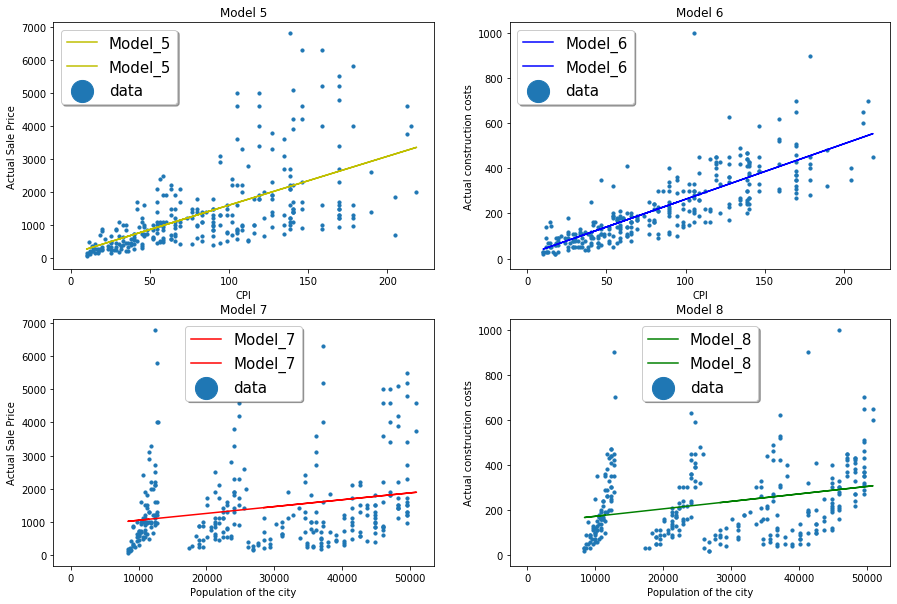

In [318]:
fig1, axes2 = plt.subplots(2, 2, figsize=(15, 10))
# Model 5
axes2[0][0].scatter(X5, Y5, s = 10, label = 'data')
axes2[0][0].plot(X5, M5_predict,2, color = 'y', label = 'Model_5')
axes2[0][0].set(xlabel = 'CPI', ylabel = 'Actual Sale Price', title = 'Model 5')
axes2[0][0].legend(shadow = True, markerscale = 7, fontsize = 15)
# Model 6
axes2[0][1].scatter(X6, Y6, s = 10, label = 'data')
axes2[0][1].plot(X6, M6_predict, color = 'b', label = 'Model_6')
axes2[0][1].set(xlabel = 'CPI', ylabel = 'Actual construction costs', title = 'Model 6')
axes2[0][1].legend(shadow = True, markerscale = 7, fontsize = 15)
# Model 7
axes2[1][0].scatter(X7, Y7, s = 10, label = 'data')
axes2[1][0].plot(X7, M7_predict, color = 'r', label = 'Model_7')
axes2[1][0].set(xlabel = 'Population of the city', ylabel = 'Actual Sale Price', title = 'Model 7')
axes2[1][0].legend(shadow = True, markerscale = 7, fontsize = 15)
# Model 8
axes2[1][1].scatter(X8, Y8, s = 10, label = 'data')
axes2[1][1].plot(X8, M8_predict, color = 'g', label = 'Model_8')
axes2[1][1].set(xlabel = 'Population of the city', ylabel = 'Actual construction costs', title = 'Model 8')
axes2[1][1].legend(shadow = True, markerscale = 7, fontsize = 15)

From the eight one degree univariate linear regression model graphs above, Model 3, Model 4 and Model 6 showed that they were good fit for the data. However, Model 1, Model 2, Model7 and Model 8 are not appropriate model for prediction.

### MSE and Cross Validation of Univariate Regression:

In [319]:
sample_size = len(v2_model_1)
MSE_model1 = ((Y - M1_predict)**2).sum()/sample_size
MSE_model2 = ((Y2 - M2_predict)**2).sum()/sample_size
MSE_model3 = ((Y3 - M3_predict)**2).sum()/sample_size
MSE_model4 = ((Y4 - M4_predict)**2).sum()/sample_size
MSE_model5 = ((Y5 - M5_predict)**2).sum()/sample_size
MSE_model6 = ((Y6 - M6_predict)**2).sum()/sample_size
MSE_model7 = ((Y7 - M7_predict)**2).sum()/sample_size
MSE_model8 = ((Y8 - M8_predict)**2).sum()/sample_size

In [320]:
test_samplesize = len(df_test[:,5])
y_saleprice_test = df_test[:,9]
y_saleprice_test = y_saleprice_test.astype(np.float64)
y_constrPrice_test = df_test[:,10]
y_constrPrice_test = y_constrPrice_test.astype(np.float64)
v2_test = df_test[:,5]
v2_test = v2_test.astype(np.float64)
v8_test = df_test[:,6]
v8_test = v8_test.astype(np.float64)
v26_test = df_test[:,7]
v26_test = v26_test.astype(np.float64)
v28_test = df_test[:,8]
v28_test = v28_test.astype(np.float64)

M1_test_predict = ws[0] + ws[1] * v2_test
M2_test_predict = ws2[0] + ws2[1] * v2_test
M3_test_predict = ws3[0] + ws3[1] * v8_test
M4_test_predict = ws4[0] + ws4[1] * v8_test
M5_test_predict = ws5[0] + ws5[1] * v26_test
M6_test_predict = ws6[0] + ws6[1] * v26_test
M7_test_predict = ws7[0] + ws7[1] * v28_test
M8_test_predict = ws8[0] + ws8[1] * v28_test

In [321]:
MSE_model1_test = ((y_saleprice_test - M1_test_predict)**2).sum()/test_samplesize
MSE_model2_test = ((y_constrPrice_test - M2_test_predict)**2).sum()/test_samplesize
MSE_model3_test = ((y_saleprice_test - M3_test_predict)**2).sum()/test_samplesize
MSE_model4_test = ((y_constrPrice_test - M4_test_predict)**2).sum()/test_samplesize
MSE_model5_test = ((y_saleprice_test - M5_test_predict)**2).sum()/test_samplesize
MSE_model6_test = ((y_constrPrice_test - M6_test_predict)**2).sum()/test_samplesize
MSE_model7_test = ((y_saleprice_test - M7_test_predict)**2).sum()/test_samplesize
MSE_model8_test = ((y_constrPrice_test - M8_test_predict)**2).sum()/test_samplesize

### MSE of Model 1, 3, 5, 7 for Training and Test data on *Price*

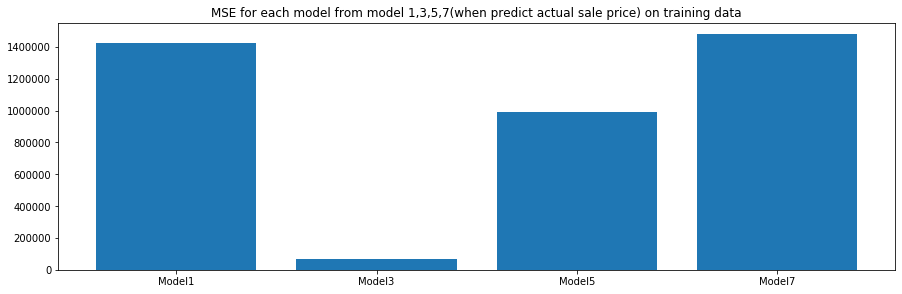

Model_1 MSE is 1421972.218695 , Model_3 MSE is 69896.616884 , 
Model_5 MSE is 992086.745042 , Model_7 MSE is 1477996.704362 , 


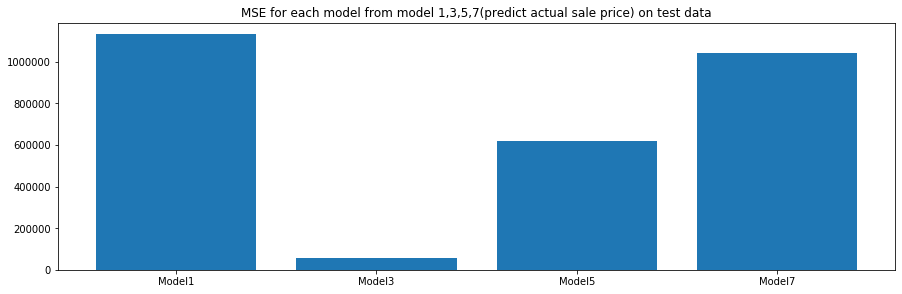

On test data, 
Model_1 test MSE is 1131322.774236 , Model_3 test MSE is 58501.408878 , 
Model_5 test MSE is 621548.287003 , Model_7 test MSE is 1042195.157549 , 


In [322]:
plt.subplot(2,1,1)
MSE_xaxis_saleprice = ['Model1','Model3','Model5','Model7']
MSE_yaxis_saleprice = [MSE_model1,MSE_model3,MSE_model5,MSE_model7]
plt.bar(MSE_xaxis_saleprice, MSE_yaxis_saleprice)
plt.title('MSE for each model from model 1,3,5,7(when predict actual sale price) on training data')
plt.show()
print('Model_1 MSE is %f , Model_3 MSE is %f , ' % (MSE_yaxis_saleprice[0],MSE_yaxis_saleprice[1]))
print('Model_5 MSE is %f , Model_7 MSE is %f , ' % (MSE_yaxis_saleprice[2],MSE_yaxis_saleprice[3]))

plt.subplot(2,1,2)
test_MSE_xaxis_salePrice = ['Model1','Model3','Model5','Model7']
test_MSE_yaxis_salePrice = [MSE_model1_test,MSE_model3_test,MSE_model5_test,MSE_model7_test]
plt.bar(test_MSE_xaxis_salePrice, test_MSE_yaxis_salePrice)
plt.title('MSE for each model from model 1,3,5,7(predict actual sale price) on test data')
plt.show()
print('On test data, ')
print('Model_1 test MSE is %f , Model_3 test MSE is %f , ' % (test_MSE_yaxis_salePrice[0],test_MSE_yaxis_salePrice[1]))
print('Model_5 test MSE is %f , Model_7 test MSE is %f , ' % (test_MSE_yaxis_salePrice[2],test_MSE_yaxis_salePrice[3]))

### MSE of Model 2, 4, 6, 8 for Training and Test data on *Cost*

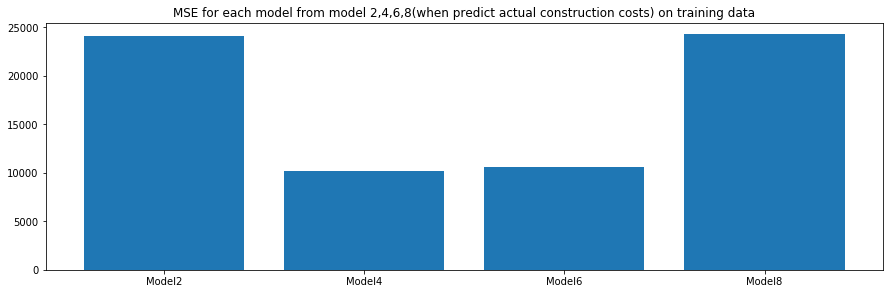

Model_2 MSE is 24036.857312 , Model_4 MSE is 10224.116554 , 
Model_6 MSE is 10552.984766 , Model_8 MSE is 24240.865620 , 


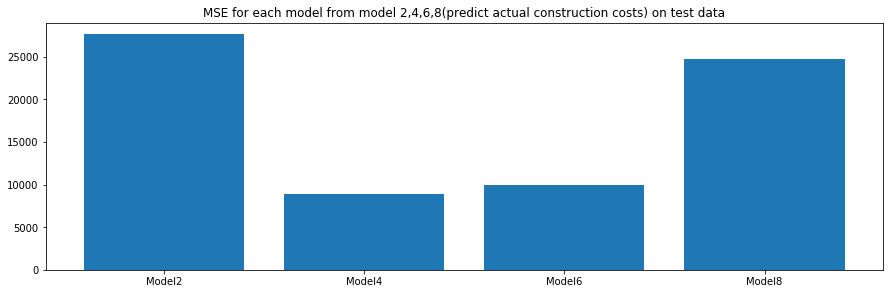

On test data, 
Model_2 test MSE is 27604.991777 , Model_4 test MSE is 8916.316030 , 
Model_6 test MSE is 9906.917840 , Model_8 test MSE is 24703.394382 , 


In [323]:
plt.subplot(2,1,1)
MSE_xaxis_constructPrice = ['Model2','Model4','Model6','Model8']
MSE_yaxis_constructPrice = [MSE_model2,MSE_model4,MSE_model6,MSE_model8]
plt.bar(MSE_xaxis_constructPrice, MSE_yaxis_constructPrice)
plt.title('MSE for each model from model 2,4,6,8(when predict actual construction costs) on training data')
plt.show()
print('Model_2 MSE is %f , Model_4 MSE is %f , ' % (MSE_yaxis_constructPrice[0],MSE_yaxis_constructPrice[1]))
print('Model_6 MSE is %f , Model_8 MSE is %f , ' % (MSE_yaxis_constructPrice[2],MSE_yaxis_constructPrice[3]))

plt.subplot(2,1,2)
test_MSE_xaxis_constrPrice = ['Model2','Model4','Model6','Model8']
test_MSE_yaxis_constrPrice = [MSE_model2_test,MSE_model4_test,MSE_model6_test,MSE_model8_test]
plt.bar(test_MSE_xaxis_constrPrice, test_MSE_yaxis_constrPrice)
plt.title('MSE for each model from model 2,4,6,8(predict actual construction costs) on test data')
plt.show()
print('On test data, ')
print('Model_2 test MSE is %f , Model_4 test MSE is %f , ' % (test_MSE_yaxis_constrPrice[0],test_MSE_yaxis_constrPrice[1]))
print('Model_6 test MSE is %f , Model_8 test MSE is %f , ' % (test_MSE_yaxis_constrPrice[2],test_MSE_yaxis_constrPrice[3]))


Based on the MSE on both training and testing data for the univariate model 1-8, we can conclude that the models don't have the issue of overfitting. Model 3 and Model 4(Price of the unit at the beginning of the project per m^2) have particularly low MSE value in both training and testing dataset. Thus, among all the variables, price of the unit at the beginning of the project per m^2 is the best predictor of sale price and construction cost. Model 6 is also a good model for predicting the construction cost, but it is not as good as model 4. 

## VII. Multivariate Regression

## Part 1: Multivariate Linear Regression on Price

In [324]:
v2 = df_use[:, 5]
v8 = df_use[:, 6]
v26 = df_use[:, 7]
v28 = df_use[:, 8]
Actual_Sale_Price = df_use[:, 9]
Actual_construction_costs = df_use[:, 10]
Actual_Sale_Price_t = df_test[:, 9]
Actual_construction_costs_t = df_test[:, 10]

### 1. Multi-2 on Price, Choose 2 Variables: V2, V28

MM1_P: $Actual Sale Price = W_{0}+ W_{1}V_{2}+ W_{2}V_{28}$

V2: Total floor area of the building

V28: Population  of the city

In [325]:
Vjoin = np.column_stack((df_use[:,5],df_use[:,8]))
Vjoin_t =  np.column_stack((df_test[:,5],df_test[:,8]))

In [326]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(Vjoin, Actual_Sale_Price)
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

print('MM1_P: Actual Sale Price = {}'.format(complex_model_1.intercept_)+ ' + {}'.format(complex_model_1.coef_[0]) + '* V2' + ' + {}'.format(complex_model_1.coef_[1]) +"* V28")

Intercept: 504.22660534062925
Coefficients: [0.20657031 0.01966032]
MM1_P: Actual Sale Price = 504.22660534062925 + 0.20657030871617585* V2 + 0.019660318125995554* V28


In [327]:
pred1_p = complex_model_1.predict(Vjoin)
mse1_p = float(format(metrics.mean_squared_error(Actual_Sale_Price,pred1_p),'.3f'))
rtr1_p = float(format(complex_model_1.score(Vjoin,Actual_Sale_Price),'.3f'))
artr1_p = float(format(adjustedR2(complex_model_1.score(Vjoin,Actual_Sale_Price),df_use.shape[0],2),'.3f'))
rte1_p = float(format(complex_model_1.score(Vjoin_t,Actual_Sale_Price_t),'.3f'))
arte1_p = float(format(adjustedR2(complex_model_1.score(Vjoin_t,Actual_Sale_Price_t),df_test.shape[0],2),'.3f'))
cv51_p = float(format(cross_val_score(complex_model_1,Vjoin,Actual_Sale_Price,cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1P','2 features on Price',mse1_p,rtr1_p,artr1_p,rte1_p,arte1_p,cv51_p]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1P,2 features on Price,1347872.83,0.136,0.133,-0.161,-0.177,0.112


### 2. Multi-2 on Price, Choose 2 Variables: V8, V26

MM2_P: $Actual Sale Price = W_{0}+ W_{1}V_{8}+ W_{2}V_{26}$

V8: Price of the unit at the beginning of the project per m^2

v26: CPI of housing, water, fuel and power in the base year

In [328]:
Vjoin = np.column_stack((df_use[:,6],df_use[:,7]))
Vjoin_t =  np.column_stack((df_test[:,6],df_test[:,7]))

In [329]:
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(Vjoin, Actual_Sale_Price)
print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

print('MM2_P: Actual Sale Price = {}'.format(complex_model_2.intercept_)+
      ' + {}'.format(complex_model_2.coef_[0]) + ' * V8' + ' + {}'.format(complex_model_2.coef_[1]) +" * V26")

Intercept: 123.55406594223905
Coefficients: [ 1.20000967 -0.44684489]
MM2_P: Actual Sale Price = 123.55406594223905 + 1.2000096688369337 * V8 + -0.44684488765233654 * V26


In [330]:
pred2_p = complex_model_2.predict(Vjoin)
mse2_p = float(format(metrics.mean_squared_error(Actual_Sale_Price,pred2_p),'.3f'))
rtr2_p = float(format(complex_model_2.score(Vjoin,Actual_Sale_Price),'.3f'))
artr2_p = float(format(adjustedR2(complex_model_2.score(Vjoin,Actual_Sale_Price),df_use.shape[0],2),'.3f'))
rte2_p = float(format(complex_model_2.score(Vjoin_t,Actual_Sale_Price_t),'.3f'))
arte2_p = float(format(adjustedR2(complex_model_2.score(Vjoin_t,Actual_Sale_Price_t),df_test.shape[0],2),'.3f'))
cv52_p = float(format(cross_val_score(complex_model_2,Vjoin,Actual_Sale_Price,cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2P','2 features on Price',mse2_p,rtr2_p,artr2_p,rte2_p,arte2_p,cv52_p]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-2P,2 features on Price,69582.114,0.955,0.955,0.943,0.942,0.950
0,Multiple Regression-1P,2 features on Price,1347872.830,0.136,0.133,-0.161,-0.177,0.112


### 3. Multi-3 on Price, Choose 3 Variables: V8, V26, V28

MM3_P: $Actual Sale Price = W_{0}+ W_{1}V_{8}+ W_{2}V_{26} + W_{3}V_{28}$

In [331]:
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(df_use[:,6:9], Actual_Sale_Price)
print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))
print('MM3_P: Actual Sale Price = {}'.format(complex_model_3.intercept_) + ' + {}'.format(complex_model_3.coef_[0]) + ' * V8' + ' + {}'.format(complex_model_3.coef_[1]) +" * V26" +  ' + {}'.format(complex_model_3.coef_[2]) + " * V28")

Intercept: 92.2894127806751
Coefficients: [ 1.19899325 -0.55917591  0.00150687]
MM3_P: Actual Sale Price = 92.2894127806751 + 1.1989932452278966 * V8 + -0.5591759056751198 * V26 + 0.0015068669946620705 * V28


In [332]:
pred3_p = complex_model_3.predict(df_use[:,6:9])
mse3_p = float(format(metrics.mean_squared_error(Actual_Sale_Price,pred3_p),'.3f'))
rtr3_p = float(format(complex_model_3.score(df_use[:,6:9],Actual_Sale_Price),'.3f'))
artr3_p = float(format(adjustedR2(complex_model_3.score(df_use[:,6:9],Actual_Sale_Price),df_use.shape[0],3),'.3f'))
rte3_p = float(format(complex_model_3.score(df_test[:,6:9],Actual_Sale_Price_t),'.3f'))
arte3_p = float(format(adjustedR2(complex_model_3.score(df_test[:,6:9],Actual_Sale_Price_t),df_test.shape[0],3),'.3f'))
cv53_p = float(format(cross_val_score(complex_model_3,df_use[:,6:9],Actual_Sale_Price,cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3P','3 features on Price',mse3_p,rtr3_p,artr3_p,rte3_p,arte3_p,cv53_p]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-2P,2 features on Price,69582.114,0.955,0.955,0.943,0.942,0.950
2,Multiple Regression-3P,3 features on Price,69187.614,0.956,0.955,0.941,0.939,0.950
0,Multiple Regression-1P,2 features on Price,1347872.830,0.136,0.133,-0.161,-0.177,0.112


### 4. Multi-3 on Price, Choose 3 Variables: V2, V8, V28

MM4_P: $Actual Sale Price = W_{0}+ W_{1}V_{2}+ W_{2}V_{8} + W_{3}V_{28}$

In [333]:
Vjoin = np.column_stack((df_use[:,5:7],df_use[:,8]))
Vjoin_t = np.column_stack((df_test[:,5:7],df_test[:,8]))

In [370]:
complex_model_4 = linear_model.LinearRegression()
complex_model_4.fit(Vjoin, Actual_Sale_Price)
print('Intercept: {}'.format(complex_model_4.intercept_))
print('Coefficients: {}'.format(complex_model_4.coef_))
print('MM4_P: Actual Sale Price = {}'.format(complex_model_4.intercept_) + ' + {}'.format(complex_model_4.coef_[0]) + ' * V2' + ' + {}'.format(complex_model_4.coef_[1]) +" * V8" +  ' + {}'.format(complex_model_4.coef_[2]) + " * V28")

Intercept: 46.62376326327649
Coefficients: [0.01960924 1.17317405 0.00120352]
MM4_P: Actual Sale Price = 46.62376326327649 + 0.01960924486188928 * V2 + 1.1731740519783975 * V8 + 0.001203519190495772 * V28


In [335]:
pred4_p = complex_model_4.predict(Vjoin)
mse4_p = float(format(metrics.mean_squared_error(Actual_Sale_Price,pred4_p),'.3f'))
rtr4_p = float(format(complex_model_4.score(Vjoin,Actual_Sale_Price),'.3f'))
artr4_p = float(format(adjustedR2(complex_model_4.score(Vjoin,Actual_Sale_Price),df_use.shape[0],3),'.3f'))
rte4_p = float(format(complex_model_4.score(Vjoin_t,Actual_Sale_Price_t),'.3f'))
arte4_p = float(format(adjustedR2(complex_model_4.score(Vjoin_t,Actual_Sale_Price_t),df_test.shape[0],3),'.3f'))
cv54_p = float(format(cross_val_score(complex_model_4,Vjoin,Actual_Sale_Price,cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4P','3 features on Price',mse4_p,rtr4_p,artr4_p,rte4_p,arte4_p,cv54_p]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-2P,2 features on Price,69582.114,0.955,0.955,0.943,0.942,0.950
2,Multiple Regression-3P,3 features on Price,69187.614,0.956,0.955,0.941,0.939,0.950
3,Multiple Regression-4P,3 features on Price,68574.098,0.956,0.956,0.941,0.940,0.950
0,Multiple Regression-1P,2 features on Price,1347872.830,0.136,0.133,-0.161,-0.177,0.112


### 5. Multi-4 on Price, Choose All 4 Variables

MM5_P: $Actual Sale Price = W_{0}+ W_{1}V_{2}+ W_{2}V_{8} + W_{3}V_{26} + W_{4}V_{28}$

In [336]:
complex_model_5 = linear_model.LinearRegression()
complex_model_5.fit(df_use[:,5:9], Actual_Sale_Price)
print('Intercept: {}'.format(complex_model_5.intercept_))
print('Coefficients: {}'.format(complex_model_5.coef_))
print('MM5_P: Actual Sale Price = {}'.format(complex_model_5.intercept_) + ' + {}'.format(complex_model_5.coef_[0]) + ' * V2' + ' + {}'.format(complex_model_5.coef_[1]) +" * V8" +  ' + {}'.format(complex_model_5.coef_[2]) + " * V26" +' + {}'.format(complex_model_5.coef_[3]) + " * V28")

Intercept: 66.41029417378468
Coefficients: [ 0.01900586  1.18860413 -0.51758498  0.0015348 ]
MM5_P: Actual Sale Price = 66.41029417378468 + 0.0190058623609279 * V2 + 1.188604128414098 * V8 + -0.5175849844624788 * V26 + 0.0015348048144727677 * V28


In [337]:
pred5_p = complex_model_5.predict(df_use[:,5:9])
mse5_p = float(format(metrics.mean_squared_error(Actual_Sale_Price,pred5_p),'.3f'))
rtr5_p = float(format(complex_model_5.score(df_use[:,5:9],Actual_Sale_Price),'.3f'))
artr5_p = float(format(adjustedR2(complex_model_5.score(df_use[:,5:9],Actual_Sale_Price),df_use.shape[0],4),'.3f'))
rte5_p = float(format(complex_model_5.score(df_test[:,5:9],Actual_Sale_Price_t),'.3f'))
arte5_p = float(format(adjustedR2(complex_model_5.score(df_test[:,5:9],Actual_Sale_Price_t),df_test.shape[0],4),'.3f'))
cv55_p = float(format(cross_val_score(complex_model_5,df_use[:,5:9],Actual_Sale_Price,cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-5P','All features on Price',mse5_p,rtr5_p,artr5_p,rte5_p,arte5_p,cv55_p]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-2P,2 features on Price,69582.114,0.955,0.955,0.943,0.942,0.950
2,Multiple Regression-3P,3 features on Price,69187.614,0.956,0.955,0.941,0.939,0.950
3,Multiple Regression-4P,3 features on Price,68574.098,0.956,0.956,0.941,0.940,0.950
4,Multiple Regression-5P,All features on Price,68173.398,0.956,0.956,0.942,0.939,0.950
0,Multiple Regression-1P,2 features on Price,1347872.830,0.136,0.133,-0.161,-0.177,0.112


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

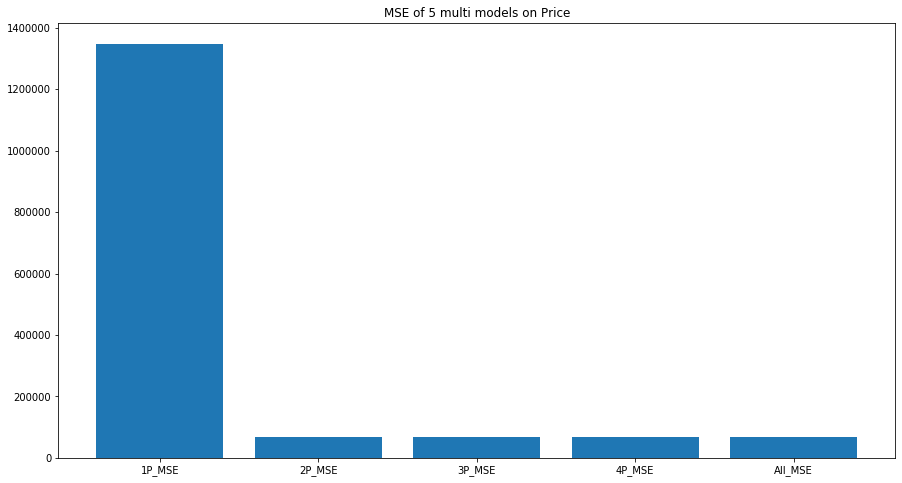

In [338]:
plt.figure(figsize=(15,8))
labels= ["1P_MSE", "2P_MSE", "3P_MSE", "4P_MSE", "All_MSE"]
data = [mse1_p, mse2_p, mse3_p, mse4_p, mse5_p]
plt.bar(labels, data)
plt.title('MSE of 5 multi models on Price')
plt.tight_layout

From the evaluation table and Mean Squared Error (MSE) graph above, except for Model MM1_P, all the other models have MSE a little bit less than 70000,which is low. They are better than most of the models of univariate regression, but Model 3 of the univariate model holds its MSE value in the same range as these multivariate models.

## Part 2: Multivariate Linear Regression on Cost

Multivariate linear regression on 2 variables among 4 independent variables

### 1. Multi-2 on Cost, Choose  V8, V26
MM1_C: $Actual~construction~costs = W_{0}+ W_{1}V_{8}+ W_{2}V_{26}$

In [339]:
Vjoin = np.column_stack((df_use[:,6],df_use[:,7]))
Vjoin_t = np.column_stack((df_test[:,6],df_test[:,7]))

In [340]:
complex_model_6 = linear_model.LinearRegression()
complex_model_6.fit(Vjoin, Actual_construction_costs)
print('Intercept: {}'.format(complex_model_6.intercept_))
print('Coefficients: {}'.format(complex_model_6.coef_))
print('MM1_C: Actual Construction Costs = {}'.format(complex_model_6.intercept_) + ' + {}'.format(complex_model_6.coef_[0]) + ' * V8' + ' + {}'.format(complex_model_6.coef_[1]) +" * V26") 

pred1_c = complex_model_6.predict(Vjoin)
mse1_c = float(format(metrics.mean_squared_error(Actual_construction_costs,pred1_c),'.3f'))
rtr1_c = float(format(complex_model_6.score(Vjoin,Actual_construction_costs),'.3f'))
artr1_c = float(format(adjustedR2(complex_model_6.score(Vjoin,Actual_construction_costs),df_use.shape[0],2),'.3f'))
rte1_c = float(format(complex_model_6.score(Vjoin_t,Actual_construction_costs_t),'.3f'))
arte1_c = float(format(adjustedR2(complex_model_6.score(Vjoin_t,Actual_construction_costs_t),df_test.shape[0],2),'.3f'))
cv51_c = float(format(cross_val_score(complex_model_6,Vjoin,Actual_construction_costs,cv=5).mean(),'.3f'))

r = evaluation_C.shape[0]
evaluation_C.loc[r] = ['Multiple Regression-1C','2 features on Cost',mse1_c,rtr1_c,artr1_c,rte1_c,arte1_c,cv51_c]
evaluation_C.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 16.83237625974985
Coefficients: [0.07705997 1.48538499]
MM1_C: Actual Construction Costs = 16.83237625974985 + 0.07705997213483627 * V8 + 1.4853849945756004 * V26


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1C,2 features on Cost,6748.842,0.744,0.743,0.779,0.776,0.743


### 2. Multi-2 on Cost, Choose  V26, V28
MM2_C: $Actual~construction~costs = W_{0}+ W_{1}V_{26}+ W_{2}V_{28}$

In [341]:
complex_model_7 = linear_model.LinearRegression()
complex_model_7.fit(df_use[:,7:9], Actual_construction_costs)
print('Intercept: {}'.format(complex_model_7.intercept_))
print('Coefficients: {}'.format(complex_model_7.coef_))
print('MM2_C: Actual Construction Costs = {}'.format(complex_model_7.intercept_) + ' + {}'.format(complex_model_7.coef_[0]) + ' * V26' + ' + {}'.format(complex_model_7.coef_[1]) +" * V28") 

pred2_c = complex_model_7.predict(df_use[:,7:9])
mse2_c = float(format(metrics.mean_squared_error(Actual_construction_costs,pred2_c),'.3f'))
rtr2_c = float(format(complex_model_7.score(df_use[:,7:9],Actual_construction_costs),'.3f'))
artr2_c = float(format(adjustedR2(complex_model_7.score(df_use[:,7:9],Actual_construction_costs),df_use.shape[0],2),'.3f'))
rte2_c = float(format(complex_model_7.score(df_test[:,7:9],Actual_construction_costs_t),'.3f'))
arte2_c = float(format(adjustedR2(complex_model_7.score(df_test[:,7:9],Actual_construction_costs_t),df_test.shape[0],2),'.3f'))
cv52_c = float(format(cross_val_score(complex_model_7,df_use[:,7:9],Actual_construction_costs,cv=5).mean(),'.3f'))

r = evaluation_C.shape[0]
evaluation_C.loc[r] = ['Multiple Regression-2C','2 features on Cost',mse2_c,rtr2_c,artr2_c,rte2_c,arte2_c,cv52_c]
evaluation_C.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 4.67068212050043
Coefficients: [2.41319112e+00 5.94088964e-04]
MM2_C: Actual Construction Costs = 4.67068212050043 + 2.4131911184139807 * V26 + 0.0005940889641068953 * V28


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1C,2 features on Cost,6748.842,0.744,0.743,0.779,0.776,0.743
1,Multiple Regression-2C,2 features on Cost,10491.562,0.602,0.600,0.626,0.620,0.612


### 3. Multi-3 on Cost, Choose 3 Variables: V8, V26, V28

MM3_C: $Actual~construction~costs = W_{0}+ W_{1}V_{8}+ W_{2}V_{26} + W_{3}V_{28}$

In [342]:
complex_model_8 = linear_model.LinearRegression()
complex_model_8.fit(df_use[:,6:9], Actual_construction_costs)
print('Intercept: {}'.format(complex_model_8.intercept_))
print('Coefficients: {}'.format(complex_model_8.coef_))
print('MM3_C: Actual Construction Costs = {}'.format(complex_model_8.intercept_) + ' + {}'.format(complex_model_8.coef_[0]) + ' * V8' + ' + {}'.format(complex_model_8.coef_[1]) +" * V26" +' + {}'.format(complex_model_8.coef_[1]) +" * V28") 

Intercept: 8.462040761106834
Coefficients: [7.67878499e-02 1.45531115e+00 4.03426266e-04]
MM3_C: Actual Construction Costs = 8.462040761106834 + 0.07678784992153691 * V8 + 1.4553111503881757 * V26 + 1.4553111503881757 * V28


In [343]:
pred3_c = complex_model_8.predict(df_use[:,6:9])
mse3_c = float(format(metrics.mean_squared_error(Actual_construction_costs,pred3_c),'.3f'))
rtr3_c = float(format(complex_model_8.score(df_use[:,6:9],Actual_construction_costs),'.3f'))
artr3_c = float(format(adjustedR2(complex_model_8.score(df_use[:,6:9],Actual_construction_costs),df_use.shape[0],3),'.3f'))
rte3_c = float(format(complex_model_8.score(df_test[:,6:9],Actual_construction_costs_t),'.3f'))
arte3_c = float(format(adjustedR2(complex_model_8.score(df_test[:,6:9],Actual_construction_costs_t),df_test.shape[0],3),'.3f'))
cv53_c = float(format(cross_val_score(complex_model_8,df_use[:,6:9],Actual_construction_costs,cv=5).mean(),'.3f'))

r = evaluation_C.shape[0]
evaluation_C.loc[r] = ['Multiple Regression-3C','selected features',mse3_c,rtr3_c,artr3_c,rte3_c,arte3_c,cv53_c]
evaluation_C.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1C,2 features on Cost,6748.842,0.744,0.743,0.779,0.776,0.743
2,Multiple Regression-3C,selected features,6720.566,0.745,0.743,0.781,0.775,0.742
1,Multiple Regression-2C,2 features on Cost,10491.562,0.602,0.600,0.626,0.620,0.612


### 4. Multi-3 on Cost, Choose 3 Variables: V2, V8, V28

MM4_C: $Actual~construction~costs = W_{0}+ W_{1}V_{2}+ W_{2}V_{8} + W_{3}V_{28}$

In [344]:
Vjoin = np.column_stack((df_use[:,5:7],df_use[:,8]))
Vjoin_t = np.column_stack((df_test[:,5:7],df_test[:,8]))

In [345]:
complex_model_9 = linear_model.LinearRegression()
complex_model_9.fit(Vjoin, Actual_construction_costs)
print('Intercept: {}'.format(complex_model_9.intercept_))
print('Coefficients: {}'.format(complex_model_9.coef_))
print('MM4_C: Actual Construction Costs = {}'.format(complex_model_9.intercept_) + ' + {}'.format(complex_model_9.coef_[0]) + ' * V2' + ' + {}'.format(complex_model_9.coef_[1]) +" * V8" +' + {}'.format(complex_model_9.coef_[1]) +" * V28")

Intercept: 51.539003323543994
Coefficients: [0.00810441 0.11544297 0.00136312]
MM4_C: Actual Construction Costs = 51.539003323543994 + 0.008104412344534484 * V2 + 0.11544296875839485 * V8 + 0.11544296875839485 * V28


In [346]:
pred4_c = complex_model_9.predict(Vjoin)
mse4_c = float(format(metrics.mean_squared_error(Actual_construction_costs,pred4_c),'.3f'))
rtr4_c = float(format(complex_model_9.score(Vjoin,Actual_construction_costs),'.3f'))
artr4_c = float(format(adjustedR2(complex_model_9.score(Vjoin,Actual_construction_costs),df_use.shape[0],3),'.3f'))
rte4_c = float(format(complex_model_9.score(Vjoin_t,Actual_construction_costs_t),'.3f'))
arte4_c = float(format(adjustedR2(complex_model_9.score(Vjoin_t,Actual_construction_costs_t),df_test.shape[0],3),'.3f'))
cv54_c = float(format(cross_val_score(complex_model_9,Vjoin,Actual_construction_costs,cv=5).mean(),'.3f'))

r = evaluation_C.shape[0]
evaluation_C.loc[r] = ['Multiple Regression-4C','3 features on Price',mse4_c,rtr4_c,artr4_c,rte4_c,arte4_c,cv54_c]
evaluation_C.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1C,2 features on Cost,6748.842,0.744,0.743,0.779,0.776,0.743
2,Multiple Regression-3C,selected features,6720.566,0.745,0.743,0.781,0.775,0.742
1,Multiple Regression-2C,2 features on Cost,10491.562,0.602,0.600,0.626,0.620,0.612
3,Multiple Regression-4C,3 features on Price,9711.646,0.631,0.629,0.675,0.666,0.596


### 5. Multi-4 on Cost, Choose All 4 Variables





MM5_C: $Actual~construction~costs = W_{0}+ W_{1}V_{2}+ W_{2}V_{8} + W_{3}V_{26} + W_{4}V_{28}$

In [347]:
complex_model_10 = linear_model.LinearRegression()
complex_model_10.fit(df_use[:,5:9], Actual_construction_costs)
print('Intercept: {}'.format(complex_model_10.intercept_))
print('Coefficients: {}'.format(complex_model_10.coef_))
print('MM5_C: Actual Construction Costs = {}'.format(complex_model_10.intercept_) + ' + {}'.format(complex_model_10.coef_[0]) + ' * V2' + ' + {}'.format(complex_model_10.coef_[1]) +" * V8" +' + {}'.format(complex_model_10.coef_[2]) +" * V26" + ' + {}'.format(complex_model_10.coef_[3]) +" * V28")

Intercept: -4.917462596158032
Coefficients: [9.82603013e-03 7.14166769e-02 1.47681366e+00 4.17870118e-04]
MM5_C: Actual Construction Costs = -4.917462596158032 + 0.00982603013373434 * V2 + 0.07141667691519339 * V8 + 1.4768136551082758 * V26 + 0.00041787011826351084 * V28


In [348]:
pred5_c = complex_model_10.predict(df_use[:,5:9])
mse5_c = float(format(metrics.mean_squared_error(Actual_construction_costs,pred4_c),'.3f'))
rtr5_c = float(format(complex_model_10.score(df_use[:,5:9],Actual_construction_costs),'.3f'))
artr5_c = float(format(adjustedR2(complex_model_10.score(df_use[:,5:9],Actual_construction_costs),df_use.shape[0],3),'.3f'))
rte5_c = float(format(complex_model_10.score(df_test[:,5:9],Actual_construction_costs_t),'.3f'))
arte5_c = float(format(adjustedR2(complex_model_10.score(df_test[:,5:9],Actual_construction_costs_t),df_test.shape[0],3),'.3f'))
cv55_c = float(format(cross_val_score(complex_model_10,df_use[:,5:9],Actual_construction_costs,cv=5).mean(),'.3f'))

r = evaluation_C.shape[0]
evaluation_C.loc[r] = ['Multiple Regression-5C','All features on Price',mse5_c,rtr5_c,artr5_c,rte5_c,arte5_c,cv55_c]
evaluation_C.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-5C,All features on Price,9711.646,0.755,0.754,0.785,0.779,0.745
0,Multiple Regression-1C,2 features on Cost,6748.842,0.744,0.743,0.779,0.776,0.743
2,Multiple Regression-3C,selected features,6720.566,0.745,0.743,0.781,0.775,0.742
1,Multiple Regression-2C,2 features on Cost,10491.562,0.602,0.600,0.626,0.620,0.612
3,Multiple Regression-4C,3 features on Price,9711.646,0.631,0.629,0.675,0.666,0.596


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

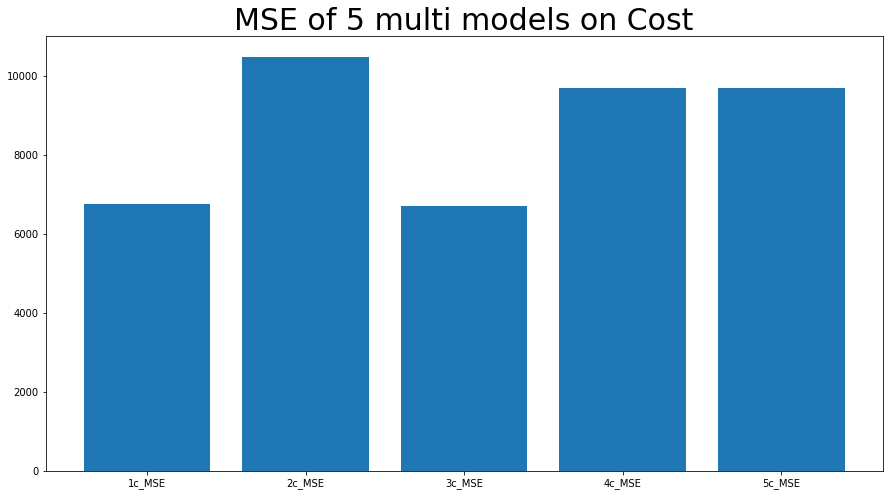

In [349]:
plt.figure(figsize=(15,8))
labels= ["1c_MSE", "2c_MSE", "3c_MSE", "4c_MSE", "5c_MSE"]
data = [mse1_c, mse2_c, mse3_c, mse4_c, mse5_c]
plt.bar(labels, data)
plt.title('MSE of 5 multi models on Cost', fontsize = 30)
plt.tight_layout

## VIII. Polynomial Regression

### Degree 2, All features, univariate

#### 1. Model 1: Actual Sale Price = w0 + w1*V2 + w2*(V2^2)where V2 is Total floor area of the building, and w0, w1, w2 are the weights.

In [350]:
v2_model_1 = df_use[:, 5]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X1 = v2_model_1 
X1 = X1.astype(np.float64) # X was treated as an object and needed to be floats
Y1 = Actual_Sale_Price
Y1 = np.array(Y1)
Y1 = Y1.astype(np.float64)

ones1 = np.ones([len(X1), ], dtype = int)

X1_square = X1**2
A1_p = np.vstack((ones1, X1, X1_square))
A11_p = A1_p.transpose()
A11_p.shape # 372 X 3
## Solve for w, the weight vector
ws1_p = np.linalg.lstsq(A11_p, Y1, rcond=None)[0]
print('Model1: Actual Sale Price = %f + %f * V2 + %f * (V2^2)' % (ws1_p[0], ws1_p[1], ws1_p[2]))

Model1: Actual Sale Price = 720.843597 + 0.494396 * V2 + -0.000027 * (V2^2)


#### 2. Model 2: Actual construction costs = w0 + w1V2 + w2(V2^2)where V2 is Total floor area of the building, and w0, w1, w2 are the weights.

In [351]:
v2_model_2 = df_use[:, 5]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X2 = v2_model_2 
X2 = X2.astype(np.float64) # X was treated as an object and needed to be floats
Y2 = Actual_construction_costs
Y2 = np.array(Y2)
Y2 = Y2.astype(np.float64)

ones2 = np.ones([len(X2), ], dtype = int)

X2_square = X2**2
A2_p = np.vstack((ones2, X2, X2_square))
A22_p = A2_p.transpose()
A22_p.shape # 372 X 3
## Solve for w, the weight vector
ws2_p = np.linalg.lstsq(A22_p, Y2, rcond=None)[0]
print('Model2: Actual construction costs = %f + %f * V2 + %f * (V2^2)' % (ws2_p[0], ws2_p[1], ws2_p[2]))

Model2: Actual construction costs = 163.826149 + 0.044932 * V2 + -0.000002 * (V2^2)


#### 3. Model 3: Actual Sale Price = w0 + w1*V8 + w2(V8^2) where V8 is Price of the unit at the beginning of the project per m^2, and w0, w1, w2 are the weights.

In [352]:
v8_model_3 = df_use[:, 6]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X3 = v8_model_3
X3 = X3.astype(np.float64) # X was treated as an object and needed to be floats
Y3 = Actual_Sale_Price
Y3 = np.array(Y3)
Y3 = Y3.astype(np.float64)

ones3 = np.ones([len(X3), ], dtype = int)

X3_square = X3**2
A3_p = np.vstack((ones3, X3, X3_square))
A33_p = A3_p.transpose()
A33_p.shape # 372 X 3
## Solve for w, the weight vector
ws3_p = np.linalg.lstsq(A33_p, Y3, rcond=None)[0]
print('Model3: Actual Sale Price = %f + %f * V8 + %f * (V8^2)' % (ws3_p[0], ws3_p[1], ws3_p[2]))

Model3: Actual Sale Price = -60.739105 + 1.463253 * V8 + -0.000064 * (V8^2)


#### 4. Model 4: Actual construction costs = w0 + w1*V8 + w2(V8^2) where V8 is Price of the unit at the beginning of the project per m^2, and w0, w1, w2 are the weights.

In [353]:
v8_model_4 = df_use[:, 6]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X4 = v8_model_4 
X4 = X4.astype(np.float64) # X was treated as an object and needed to be floats
Y4 = Actual_construction_costs
Y4 = np.array(Y4)
Y4 = Y4.astype(np.float64)

ones4 = np.ones([len(X4), ], dtype = int)

X4_square = X4**2
A4_p = np.vstack((ones4, X4, X4_square))
A44_p = A4_p.transpose()
A44_p.shape # 372 X 3
## Solve for w, the weight vector
ws4_p = np.linalg.lstsq(A44_p, Y4, rcond=None)[0]
print('Model4: Actual construction costs = %f + %f * V8 + %f * (V8^2)' % (ws4_p[0], ws4_p[1], ws4_p[2]))

Model4: Actual construction costs = 48.788232 + 0.202993 * V8 + -0.000018 * (V8^2)


#### 5. Model 5: Actual Sale Price = w0 + w1*V26 +  w2(V26^2) where V26 is CPI of housing, water, fuel and power in the base year, and w0, w1, w2 are the weights.

In [354]:
v26_model_5 = df_use[:, 7]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X5 = v26_model_5
X5 = X5.astype(np.float64) # X was treated as an object and needed to be floats
Y5 = Actual_Sale_Price
Y5 = np.array(Y5)
Y5 = Y5.astype(np.float64)

ones5 = np.ones([len(X5), ], dtype = int)

X5_square = X5**2
A5_p = np.vstack((ones5, X5, X5_square))
A55_p = A5_p.transpose()
A55_p.shape # 372 X 3
## Solve for w, the weight vector
ws5_p = np.linalg.lstsq(A55_p, Y5, rcond=None)[0]
print('Model5: Actual Sale Price = %f + %f * V26 + %f * (V26^2)' % (ws5_p[0], ws5_p[1], ws5_p[2]))

Model5: Actual Sale Price = -50.021664 + 19.840120 * V26 + -0.026047 * (V26^2)


#### 6. Model 6: Actual construction costs = w0 + w1*V26 + w2(V26^2) where V26 is CPI of housing, water, fuel and power in the base year, and w0, w1, w2 are the weights.

In [355]:
v26_model_6 = df_use[:, 7]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X6 = v26_model_6 
X6 = X6.astype(np.float64) # X was treated as an object and needed to be floats
Y6 = Actual_construction_costs
Y6 = np.array(Y6)
Y6 = Y6.astype(np.float64)

ones6 = np.ones([len(X6), ], dtype = int)

X6_square = X6**2
A6_p = np.vstack((ones6, X6, X6_square))
A66_p = A6_p.transpose()
A66_p.shape # 372 X 3
## Solve for w, the weight vector
ws6_p = np.linalg.lstsq(A66_p, Y6, rcond=None)[0]
print('Model6: Actual construction costs = %f + %f * V26 + %f * (V26^2)' % (ws6_p[0], ws6_p[1], ws6_p[2]))

Model6: Actual construction costs = 14.210937 + 2.542770 * V26 + -0.000412 * (V26^2)


#### Model 7: Actual Sale Price = w0 + w1*V28 + w2(V28^2) where V28 is population of the city, and w0, w1, w2 are the weights.

In [356]:
v28_model_7 = df_use[:, 8]
Actual_Sale_Price = df_use[:, 9]
## Create A, the augmented data array
X7 = v28_model_7
X7 = X7.astype(np.float64) # X was treated as an object and needed to be floats
Y7 = Actual_Sale_Price
Y7 = np.array(Y7)
Y7 = Y7.astype(np.float64)

ones7 = np.ones([len(X7), ], dtype = int)

X7_square = X7**2
A7_p = np.vstack((ones7, X7, X7_square))
A77_p = A7_p.transpose()
A77_p.shape # 372 X 3
## Solve for w, the weight vector
ws7_p = np.linalg.lstsq(A77_p, Y7, rcond=None)[0]
print('Model7: Actual Sale Price = %f + %f * V28 + %f * (V28^2)' % (ws7_p[0], ws7_p[1], ws7_p[2]))

Model7: Actual Sale Price = 1707.948283 + -0.058970 * V28 + 0.000001 * (V28^2)


#### Model 8: Actual construction costs = w0 + w1*V28 + w2(V28^2) where V28 is population of the city, and w0, w1, w2 are the weights.

In [357]:
v28_model_8 = df_use[:, 8]
Actual_construction_costs = df_use[:, 10]
## Create A, the augmented data array
X8 = v28_model_8 
X8 = X8.astype(np.float64) # X was treated as an object and needed to be floats
Y8 = Actual_construction_costs
Y8 = np.array(Y8)
Y8 = Y8.astype(np.float64)

ones8 = np.ones([len(X8), ], dtype = int)

X8_square = X8**2
A8_p = np.vstack((ones8, X8, X8_square))
A88_p = A8_p.transpose()
A88_p.shape # 372 X 3
## Solve for w, the weight vector
ws8_p = np.linalg.lstsq(A88_p, Y8, rcond=None)[0]
print('Model8: Actual construction costs = %f + %f * V28 + %f * (V28^2)' % (ws8_p[0], ws8_p[1], ws8_p[2]))

Model8: Actual construction costs = 277.052545 + -0.009281 * V28 + 0.000000 * (V28^2)


#### model prediction

In [358]:
M1_predict_p = ws1_p[0] + ws1_p[1] * X + ws1_p[2] * (X**2)
M2_predict_p = ws2_p[0] + ws2_p[1] * X2 + ws2_p[2] * (X2**2)
M3_predict_p = ws3_p[0] + ws3_p[1] * X3 + ws3_p[2] * (X3**2)
M4_predict_p = ws4_p[0] + ws4_p[1] * X4 + ws4_p[2] * (X4**2)
M5_predict_p = ws5_p[0] + ws5_p[1] * X5 + ws5_p[2] * (X5**2)
M6_predict_p = ws6_p[0] + ws6_p[1] * X6 + ws6_p[2] * (X6**2)
M7_predict_p = ws7_p[0] + ws7_p[1] * X7 + ws7_p[2] * (X7**2)
M8_predict_p = ws8_p[0] + ws8_p[1] * X8 + ws8_p[2] * (X8**2)

In [359]:
sample_size = len(v2_model_1)
MSE_model1_p = ((Y1 - M1_predict_p)**2).sum()/sample_size
MSE_model2_p = ((Y2 - M2_predict_p)**2).sum()/sample_size
MSE_model3_p = ((Y3 - M3_predict_p)**2).sum()/sample_size
MSE_model4_p = ((Y4 - M4_predict_p)**2).sum()/sample_size
MSE_model5_p = ((Y5 - M5_predict_p)**2).sum()/sample_size
MSE_model6_p = ((Y6 - M6_predict_p)**2).sum()/sample_size
MSE_model7_p = ((Y7 - M7_predict_p)**2).sum()/sample_size
MSE_model8_p = ((Y8 - M8_predict_p)**2).sum()/sample_size

test_samplesize = len(df_test[:,5])
y_saleprice_test = df_test[:,9]
y_saleprice_test = y_saleprice_test.astype(np.float64)
y_constrPrice_test = df_test[:,10]
y_constrPrice_test = y_constrPrice_test.astype(np.float64)
v2_test = df_test[:,5]
v2_test = v2_test.astype(np.float64)
v8_test = df_test[:,6]
v8_test = v8_test.astype(np.float64)
v26_test = df_test[:,7]
v26_test = v26_test.astype(np.float64)
v28_test = df_test[:,8]
v28_test = v28_test.astype(np.float64)

M1_test_predict_p = ws1_p[0] + ws1_p[1] * v2_test + ws1_p[2] * (v2_test**2)
M2_test_predict_p = ws2_p[0] + ws2_p[1] * v2_test + ws2_p[2] * (v2_test**2)
M3_test_predict_p = ws3_p[0] + ws3_p[1] * v8_test + ws3_p[2] * (v8_test**2)
M4_test_predict_p = ws4_p[0] + ws4_p[1] * v8_test + ws4_p[2] * (v8_test**2)
M5_test_predict_p = ws5_p[0] + ws5_p[1] * v26_test + ws5_p[2] * (v26_test**2)
M6_test_predict_p = ws6_p[0] + ws6_p[1] * v26_test + ws6_p[2] * (v26_test**2)
M7_test_predict_p = ws7_p[0] + ws7_p[1] * v28_test + ws7_p[2] * (v28_test**2)
M8_test_predict_p = ws8_p[0] + ws8_p[1] * v28_test + ws8_p[2] * (v28_test**2)

MSE_model1_test_p = ((y_saleprice_test - M1_test_predict_p)**2).sum()/test_samplesize
MSE_model2_test_p = ((y_constrPrice_test - M2_test_predict_p)**2).sum()/test_samplesize
MSE_model3_test_p = ((y_saleprice_test - M3_test_predict_p)**2).sum()/test_samplesize
MSE_model4_test_p = ((y_constrPrice_test - M4_test_predict_p)**2).sum()/test_samplesize
MSE_model5_test_p = ((y_saleprice_test - M5_test_predict_p)**2).sum()/test_samplesize
MSE_model6_test_p = ((y_constrPrice_test - M6_test_predict_p)**2).sum()/test_samplesize
MSE_model7_test_p = ((y_saleprice_test - M7_test_predict_p)**2).sum()/test_samplesize
MSE_model8_test_p = ((y_constrPrice_test - M8_test_predict_p)**2).sum()/test_samplesize

### MSE of Model 1, 3, 5, 7 for Training and Test data on *Price* of 2 degree polynomial regression model

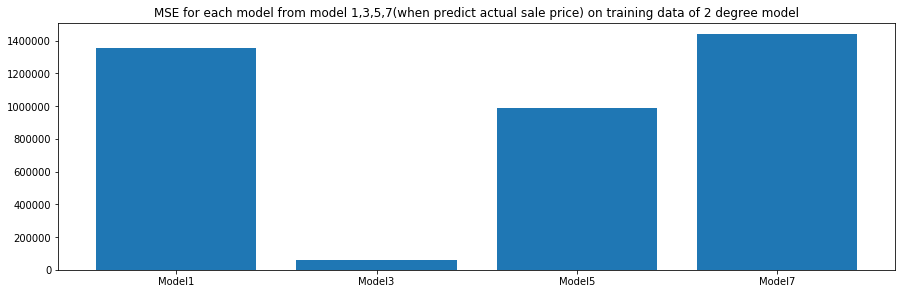

Model_1 MSE is 1353388.879445 , Model_3 MSE is 59792.460043 , 
Model_5 MSE is 987213.846062 , Model_7 MSE is 1436924.261259 , 


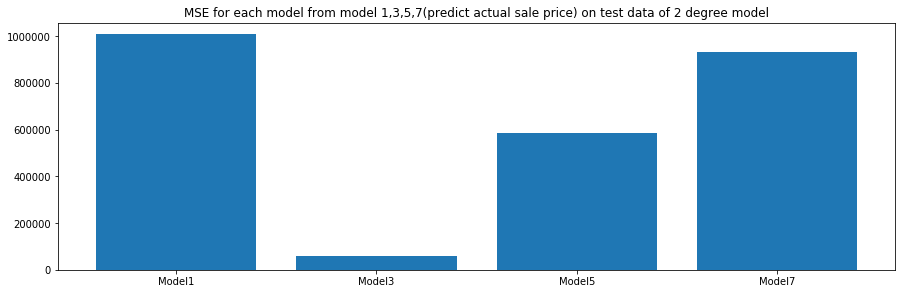

On test data, 
Model_1 test MSE is 1007589.266769 , Model_3 test MSE is 58002.539585 , 
Model_5 test MSE is 586849.308605 , Model_7 test MSE is 934644.864772 , 


In [360]:
plt.subplot(2,1,1)
MSE_xaxis_saleprice_p = ['Model1','Model3','Model5','Model7']
MSE_yaxis_saleprice_p = [MSE_model1_p,MSE_model3_p,MSE_model5_p,MSE_model7_p]
plt.bar(MSE_xaxis_saleprice_p, MSE_yaxis_saleprice_p)
plt.title('MSE for each model from model 1,3,5,7(when predict actual sale price) on training data of 2 degree model')
plt.show()
print('Model_1 MSE is %f , Model_3 MSE is %f , ' % (MSE_yaxis_saleprice_p[0],MSE_yaxis_saleprice_p[1]))
print('Model_5 MSE is %f , Model_7 MSE is %f , ' % (MSE_yaxis_saleprice_p[2],MSE_yaxis_saleprice_p[3]))

plt.subplot(2,1,2)
test_MSE_xaxis_salePrice_p = ['Model1','Model3','Model5','Model7']
test_MSE_yaxis_salePrice_p = [MSE_model1_test_p,MSE_model3_test_p,MSE_model5_test_p,MSE_model7_test_p]
plt.bar(test_MSE_xaxis_salePrice_p, test_MSE_yaxis_salePrice_p)
plt.title('MSE for each model from model 1,3,5,7(predict actual sale price) on test data of 2 degree model')
plt.show()
print('On test data, ')
print('Model_1 test MSE is %f , Model_3 test MSE is %f , ' % (test_MSE_yaxis_salePrice_p[0],test_MSE_yaxis_salePrice_p[1]))
print('Model_5 test MSE is %f , Model_7 test MSE is %f , ' % (test_MSE_yaxis_salePrice_p[2],test_MSE_yaxis_salePrice_p[3]))

### MSE of Model 2, 4, 6, 8 for Training and Test data on *Cost* of 2 degree model

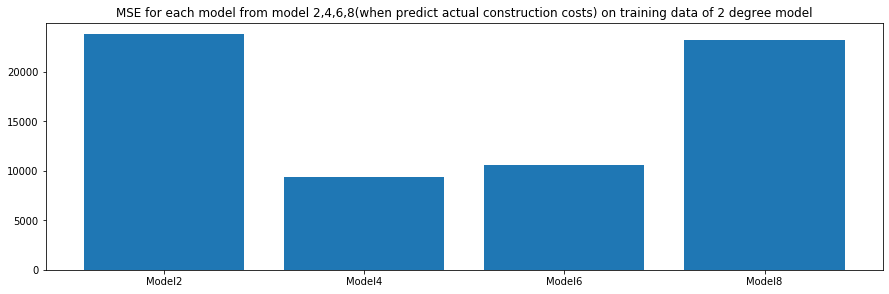

Model_2 MSE is 23774.561396 , Model_4 MSE is 9390.345308 , 
Model_6 MSE is 10551.765109 , Model_8 MSE is 23214.568742 , 


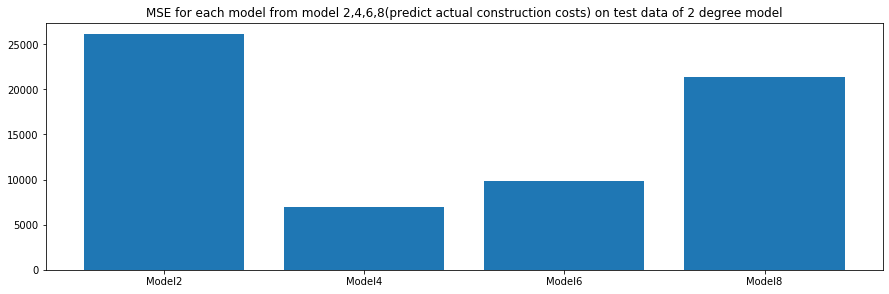

On test data, 
Model_2 test MSE is 26066.108783 , Model_4 test MSE is 6924.863139 , 
Model_6 test MSE is 9862.330711 , Model_8 test MSE is 21329.088401 , 


In [361]:
plt.subplot(2,1,1)
MSE_xaxis_constructPrice_p = ['Model2','Model4','Model6','Model8']
MSE_yaxis_constructPrice_p = [MSE_model2_p,MSE_model4_p,MSE_model6_p,MSE_model8_p]
plt.bar(MSE_xaxis_constructPrice_p, MSE_yaxis_constructPrice_p)
plt.title('MSE for each model from model 2,4,6,8(when predict actual construction costs) on training data of 2 degree model')
plt.show()
print('Model_2 MSE is %f , Model_4 MSE is %f , ' % (MSE_yaxis_constructPrice_p[0],MSE_yaxis_constructPrice_p[1]))
print('Model_6 MSE is %f , Model_8 MSE is %f , ' % (MSE_yaxis_constructPrice_p[2],MSE_yaxis_constructPrice_p[3]))

plt.subplot(2,1,2)
test_MSE_xaxis_constrPrice_p = ['Model2','Model4','Model6','Model8']
test_MSE_yaxis_constrPrice_p = [MSE_model2_test_p,MSE_model4_test_p,MSE_model6_test_p,MSE_model8_test_p]
plt.bar(test_MSE_xaxis_constrPrice_p, test_MSE_yaxis_constrPrice_p)
plt.title('MSE for each model from model 2,4,6,8(predict actual construction costs) on test data of 2 degree model')
plt.show()
print('On test data, ')
print('Model_2 test MSE is %f , Model_4 test MSE is %f , ' % (test_MSE_yaxis_constrPrice_p[0],test_MSE_yaxis_constrPrice_p[1]))
print('Model_6 test MSE is %f , Model_8 test MSE is %f , ' % (test_MSE_yaxis_constrPrice_p[2],test_MSE_yaxis_constrPrice_p[3]))

### Comparison of 1 degree and 2 degree models 1, 3, 5, 7 on sale price

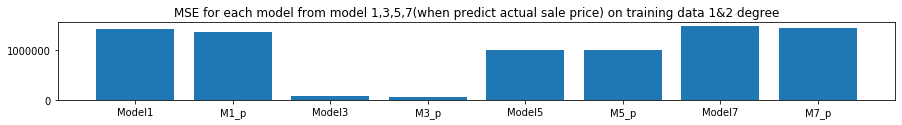

[1421972.2186947588, 1353388.8794448848, 69896.61688407433, 59792.46004294002, 992086.7450423945, 987213.846061676, 1477996.7043615195, 1436924.2612592385]


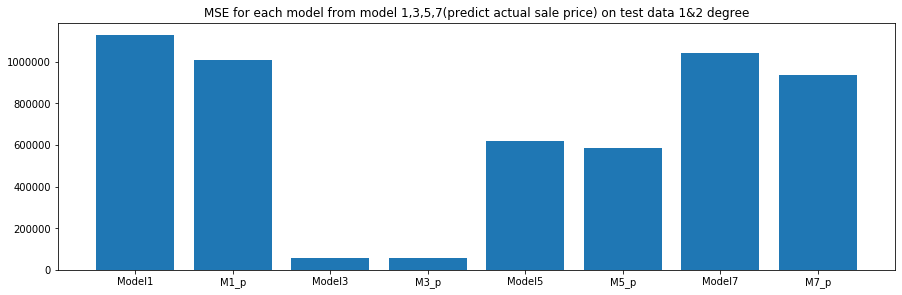

[1131322.7742364933, 1007589.2667691786, 58501.408878022965, 58002.53958509254, 621548.2870025219, 586849.3086052217, 1042195.157549447, 934644.8647724994]


In [362]:
plt.subplot(2,1,1)
MSE_xaxis_saleprice_compare = ['Model1','M1_p','Model3','M3_p','Model5','M5_p','Model7','M7_p']
MSE_yaxis_saleprice_compare = [MSE_model1,MSE_model1_p,MSE_model3,MSE_model3_p,MSE_model5,MSE_model5_p,MSE_model7,MSE_model7_p,]
plt.bar(MSE_xaxis_saleprice_compare, MSE_yaxis_saleprice_compare)
plt.title('MSE for each model from model 1,3,5,7(when predict actual sale price) on training data 1&2 degree')
plt.show()
print(MSE_yaxis_saleprice_compare)

plt.subplot(2,1,2)
test_MSE_xaxis_salePrice_compare = ['Model1','M1_p','Model3','M3_p','Model5','M5_p','Model7','M7_p']
test_MSE_yaxis_salePrice_compare = [MSE_model1_test,MSE_model1_test_p,MSE_model3_test,MSE_model3_test_p,MSE_model5_test,MSE_model5_test_p,MSE_model7_test,MSE_model7_test_p]
plt.bar(test_MSE_xaxis_salePrice_compare, test_MSE_yaxis_salePrice_compare)
plt.title('MSE for each model from model 1,3,5,7(predict actual sale price) on test data 1&2 degree')
plt.show()
print(test_MSE_yaxis_salePrice_compare)

### Comparison of 1 degree and 2 degree models 2, 4, 6, 8 on cost

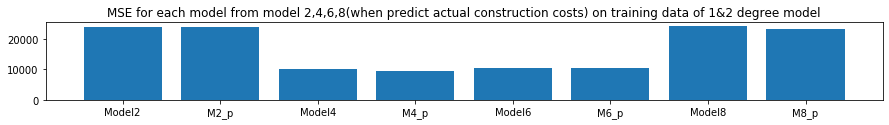

[24036.857312190426, 23774.561396206656, 10224.116554406102, 9390.3453080156, 10552.984765563284, 10551.765109227917, 24240.865619503402, 23214.56874234383]


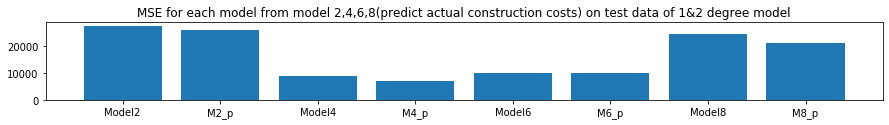

[27604.991776761886, 26066.10878323746, 8916.316030244763, 6924.863139075297, 9906.917839987962, 9862.330710994389, 24703.394382332568, 21329.08840086488]


In [363]:
plt.subplot(2,1,1)
MSE_xaxis_constructPrice_compare = ['Model2','M2_p','Model4','M4_p','Model6','M6_p','Model8','M8_p']
MSE_yaxis_constructPrice_compare = [MSE_model2,MSE_model2_p,MSE_model4,MSE_model4_p,MSE_model6,MSE_model6_p,MSE_model8,MSE_model8_p]
plt.bar(MSE_xaxis_constructPrice_compare, MSE_yaxis_constructPrice_compare)
plt.title('MSE for each model from model 2,4,6,8(when predict actual construction costs) on training data of 1&2 degree model')
plt.show()
print(MSE_yaxis_constructPrice_compare)

plt.subplot(2,1,2)
test_MSE_xaxis_constrPrice_compare = ['Model2','M2_p','Model4','M4_p','Model6','M6_p','Model8','M8_p']
test_MSE_yaxis_constrPrice_compare = [MSE_model2_test,MSE_model2_test_p,MSE_model4_test,MSE_model4_test_p,MSE_model6_test,MSE_model6_test_p,MSE_model8_test,MSE_model8_test_p]
plt.bar(test_MSE_xaxis_constrPrice_compare, test_MSE_yaxis_constrPrice_compare)
plt.title('MSE for each model from model 2,4,6,8(predict actual construction costs) on test data of 1&2 degree model')
plt.show()
print(test_MSE_yaxis_constrPrice_compare)

#### Overall, all degree 2 have a little lower MSE value than the degree 1 models. However, the MSE values showed that the differences between degree 1 and degree 2 models are not significant, and the best prediction variable is still price of the unit at the beginning of the project per m^2(v8). 

## IX. Evaluation Tables of All Models

 Model 1 to Model 8 are univariate regression models from Part VI.Polynomial models above are trained for further exploration of the independent variables. From the section above,degree 1 and degree 2 univariate models have no significant differences in MSE values, so we adopt univariate models of degree 1 here to make the comparison with the multivariate models. 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

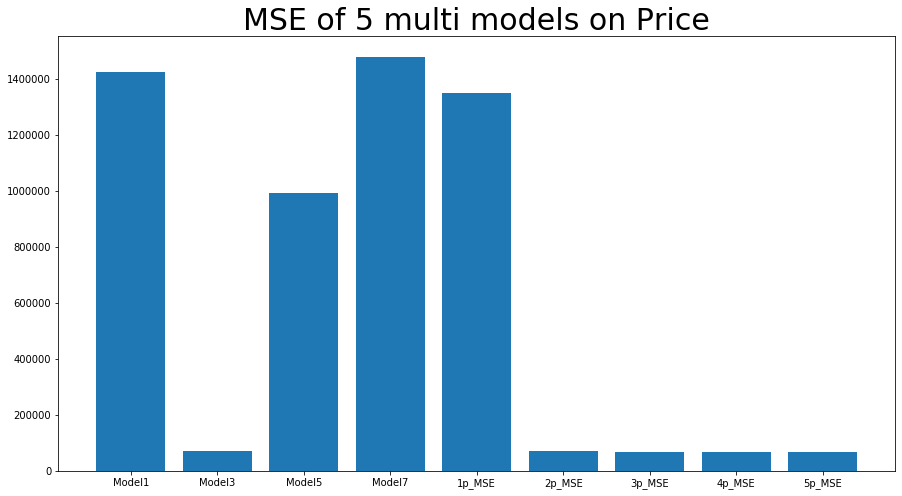

In [366]:
plt.figure(figsize=(15,8))
labels= ['Model1','Model3','Model5','Model7',"1p_MSE", "2p_MSE", "3p_MSE", "4p_MSE", "5p_MSE"]
data = [MSE_model1,MSE_model3,MSE_model5,MSE_model7, mse1_p, mse2_p, mse3_p, mse4_p, mse5_p]
plt.bar(labels, data)
plt.title('MSE of 5 multi models on Price', fontsize = 30)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

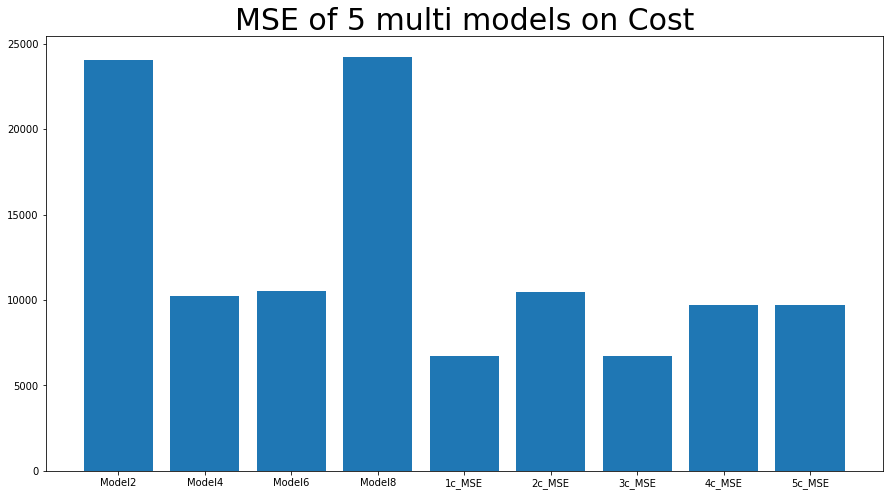

In [367]:
plt.figure(figsize=(15,8))
labels= ['Model2','Model4','Model6','Model8',"1c_MSE", "2c_MSE", "3c_MSE", "4c_MSE", "5c_MSE"]
data = [MSE_model2,MSE_model4,MSE_model6,MSE_model8, mse1_c, mse2_c, mse3_c, mse4_c, mse5_c]
plt.bar(labels, data)
plt.title('MSE of 5 multi models on Cost', fontsize = 30)
plt.tight_layout

In [368]:
evaluation

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1P,2 features on Price,1347872.830,0.136,0.133,-0.161,-0.177,0.112
1,Multiple Regression-2P,2 features on Price,69582.114,0.955,0.955,0.943,0.942,0.950
2,Multiple Regression-3P,3 features on Price,69187.614,0.956,0.955,0.941,0.939,0.950
3,Multiple Regression-4P,3 features on Price,68574.098,0.956,0.956,0.941,0.940,0.950
4,Multiple Regression-5P,All features on Price,68173.398,0.956,0.956,0.942,0.939,0.950


In [369]:
evaluation_C

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Regression-1C,2 features on Cost,6748.842,0.744,0.743,0.779,0.776,0.743
1,Multiple Regression-2C,2 features on Cost,10491.562,0.602,0.600,0.626,0.620,0.612
2,Multiple Regression-3C,selected features,6720.566,0.745,0.743,0.781,0.775,0.742
3,Multiple Regression-4C,3 features on Price,9711.646,0.631,0.629,0.675,0.666,0.596
4,Multiple Regression-5C,All features on Price,9711.646,0.755,0.754,0.785,0.779,0.745


Based on *evaluation* (evaluation of mulitvariate regression models on sale prices) and *evaluation_C* (evaluation of multivariate regression models on construction cost) dataframes, the 5-Fold Cross Validation values showe that most of the models are reliable, except for the Multiple Regression-P1(MM1_P). All multivariate models are as good as the best ultivariate model(Model 3) on sale price. 

# Conclusion

The models the research adopted here well answered the research questions. **Price of the unit at the beginning of the project per m^2 affected the sale price and actual construction price the most.** Model 3 and Model 4 (price of Unit at Beginning of Project per m ^2(V8) VS. sale price, and V8 VS. construction cost) had very low MSE value in both testing and training sets. Model 3 and Model 4 had low MSE value compared to others’.  Thus, overfitting was excluded from Model 3 and Model 4 since the testing set also got very low MSE value. Moreover, the combination of the variables showed stronger linear relationship with the price and construction cost than single variables. Although some single variables, such as the Price of Unit at Beginning of Project per m ^2(V8), could well predict the sale price alone, not all studied variables in the dataframe were able to predict the price and cost by themselves using regression analysis. 

**The further result concluded from the experiment was that the multivariate regression was more reliable when predicting both housing sale price and construction cost in general, even though some univariate model(V8) showed high reliability in predicting the price.**
MSE bar graphs on both price and cost demonstrated that: compared to the univariate linear regression models, the multivariate linear regression models on price and cost were significantly better than the models using single variables, except for the model 3, which was almost as good as the multivariate ones. 

The polynomial regression on one variable was adopted here to extensively explore the relationship between the independent variable and the dependent one. The resulting MSE graphs of polynomial regression of degree 2 showed a very similar pattern as the univariate regression model of degree one.Here,the inference was that higher degree of univariate polynomial regression models would not have significant improvement in prediction accuracy though they displayed some optimization. 

For further improvement, the students could try to explore the best multivariate regression model they could get for the actual sale price and construction cost. Another possible addition could be to consider the time change of cpi and population change during the construction of housing, which required more complex models, since the original dataset had data for five different time ranges.   








# Reference
http://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set